In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

#### Analysis of Pre-Retrofit and Post-Retrofit Data

In [2]:
df = pd.read_csv('ABE_building_energy.xlsx')
df_rf = pd.read_csv('ABE_building_retrofit_energy.xlsx')

In [3]:
# Check for null values in pre-retrofitted data
df.isnull().sum()

Office_number                         0
Date                                  0
Day                                   0
Time_interval                         0
Fridge (W)                            0
AC (W)                                0
Desktop (W)                           0
Fan (W)                               0
Laptop (W)                            0
Lighting (W)                          0
Phone (W)                             0
Total_power (W)                       0
Diff_time_interval (hrs)              0
Energy_consumed (kWh)                 0
Room_area (m^2)                       0
Room_height (m)                       0
Volume (m^3)                          0
Energy_consumed per area (kWh/m^2)    0
Condition                             0
dtype: int64

In [4]:
# Check for null in post-retrofitted data
df_rf.isnull().sum()

Office_number                         0
Date                                  0
Day                                   0
Time_interval                         0
Fridge (W)                            0
AC (W)                                0
Desktop (W)                           0
Fan (W)                               0
Laptop (W)                            0
Lighting (W)                          0
Phone (W)                             0
Total_power (W)                       0
Diff_time_interval (hrs)              0
Energy_consumed (kWh)                 0
Room_area (m^2)                       0
Room_height (m)                       0
Volume (m^3)                          0
Energy_consumed per area (kWh/m^2)    0
Condition                             0
dtype: int64

In [5]:
df.shape

(2205, 19)

In [6]:
df_rf.shape

(2205, 19)

In [7]:
# Rename columns to match the format of others.
df = df.rename(columns = {'Bulb (W)': 'Lighting (W)'})
df_rf = df_rf.rename(columns = {'Bulb (W)': 'Lighting (W)'})

In [8]:
df.head(10)

,Office_number,Date,Day,Time_interval,Fridge (W),AC (W),Desktop (W),Fan (W),Laptop (W),Lighting (W),Phone (W),Total_power (W),Diff_time_interval (hrs),Energy_consumed (kWh),Room_area (m^2),Room_height (m),Volume (m^3),Energy_consumed per area (kWh/m^2),Condition
0,1,2024-12-02,Monday,9am - 12pm,0,0,0,0,0,0,0,0,3,0.000,13.26,3.18,42.1668,0.000000,Absent
1,1,2024-12-02,Monday,12pm - 3pm,0,0,0,0,0,0,0,0,3,0.000,13.26,3.18,42.1668,0.000000,Absent
2,1,2024-12-02,Monday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.000,13.26,3.18,42.1668,0.000000,Absent
3,2,2024-12-02,Monday,9am - 12pm,0,0,0,80,65,52,0,197,3,0.591,25.30,3.18,80.4540,0.023360,On sit
4,2,2024-12-02,Monday,12pm - 3pm,0,1200,0,80,0,52,0,1332,3,3.996,25.30,3.18,80.4540,0.157945,On sit
5,2,2024-12-02,Monday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.000,25.30,3.18,80.4540,0.000000,Absent
6,3,2024-12-02,Monday,9am - 12pm,0,1200,0,80,65,26,0,1371,3,4.113,13.26,3.18,42.1668,0.310181,On sit
7,3,2024-12-02,Monday,12pm - 3pm,0,1200,0,80,0,26,0,1306,3,3.918,13.26,3.18,42.1668,0.295475,On sit
8,3,2024-12-02,Monday,3pm - 5pm,0,1200,0,80,0,26,0,1306,2,2.612,13.26,3.18,42.1668,0.196983,On sit
9,4,2024-12-02,Monday,9am - 12pm,0,0,0,0,0,0,0,0,3,0.000,27.31,3.18,86.8458,0.000000,Absent


In [9]:
df_rf.head()

,Office_number,Date,Day,Time_interval,Fridge (W),AC (W),Desktop (W),Fan (W),Laptop (W),Lighting (W),Phone (W),Total_power (W),Diff_time_interval (hrs),Energy_consumed (kWh),Room_area (m^2),Room_height (m),Volume (m^3),Energy_consumed per area (kWh/m^2),Condition
0,1,2024-12-02,Monday,9am - 12pm,0,0,0,0,0,0,0,0,3,0.000,13.26,3.18,42.1668,0.000000,Absent
1,1,2024-12-02,Monday,12pm - 3pm,0,0,0,0,0,0,0,0,3,0.000,13.26,3.18,42.1668,0.000000,Absent
2,1,2024-12-02,Monday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.000,13.26,3.18,42.1668,0.000000,Absent
3,2,2024-12-02,Monday,9am - 12pm,0,0,0,80,65,40,0,185,3,0.555,25.30,3.18,80.4540,0.021937,On sit
4,2,2024-12-02,Monday,12pm - 3pm,0,1200,0,80,0,40,0,1320,3,3.960,25.30,3.18,80.4540,0.156522,On sit


In [10]:
df.tail()

,Office_number,Date,Day,Time_interval,Fridge (W),AC (W),Desktop (W),Fan (W),Laptop (W),Lighting (W),Phone (W),Total_power (W),Diff_time_interval (hrs),Energy_consumed (kWh),Room_area (m^2),Room_height (m),Volume (m^3),Energy_consumed per area (kWh/m^2),Condition
2200,20,2025-01-31,Friday,12pm - 3pm,0,0,0,0,0,0,0,0,3,0.0,13.26,3.18,42.1668,0.0,Absent
2201,20,2025-01-31,Friday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.0,13.26,3.18,42.1668,0.0,Absent
2202,21,2025-01-31,Friday,9am - 12pm,0,0,0,0,0,0,0,0,3,0.0,1.00,3.18,3.1800,0.0,Absent
2203,21,2025-01-31,Friday,12pm - 3pm,0,0,0,0,0,0,0,0,3,0.0,1.00,3.18,3.1800,0.0,Absent
2204,21,2025-01-31,Friday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.0,1.00,3.18,3.1800,0.0,Absent


In [11]:
df_rf.tail()

,Office_number,Date,Day,Time_interval,Fridge (W),AC (W),Desktop (W),Fan (W),Laptop (W),Lighting (W),Phone (W),Total_power (W),Diff_time_interval (hrs),Energy_consumed (kWh),Room_area (m^2),Room_height (m),Volume (m^3),Energy_consumed per area (kWh/m^2),Condition
2200,20,2025-01-31,Friday,12pm - 3pm,0,0,0,0,0,0,0,0,3,0.0,13.26,3.18,42.1668,0.0,Absent
2201,20,2025-01-31,Friday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.0,13.26,3.18,42.1668,0.0,Absent
2202,21,2025-01-31,Friday,9am - 12pm,0,0,0,0,0,0,0,0,3,0.0,1.00,3.18,3.1800,0.0,Absent
2203,21,2025-01-31,Friday,12pm - 3pm,0,0,0,0,0,0,0,0,3,0.0,1.00,3.18,3.1800,0.0,Absent
2204,21,2025-01-31,Friday,3pm - 5pm,0,0,0,0,0,0,0,0,2,0.0,1.00,3.18,3.1800,0.0,Absent


In [12]:
# Check all columns
df.columns, df_rf.columns

(Index(['Office_number', 'Date', 'Day', 'Time_interval', 'Fridge (W)', 'AC (W)',
        'Desktop (W)', 'Fan (W)', 'Laptop (W)', 'Lighting (W)', 'Phone (W)',
        'Total_power (W)', 'Diff_time_interval (hrs)', 'Energy_consumed (kWh)',
        'Room_area (m^2)', 'Room_height (m)', 'Volume (m^3)',
        'Energy_consumed per area (kWh/m^2)', 'Condition'],
       dtype='object'),
 Index(['Office_number', 'Date', 'Day', 'Time_interval', 'Fridge (W)', 'AC (W)',
        'Desktop (W)', 'Fan (W)', 'Laptop (W)', 'Lighting (W)', 'Phone (W)',
        'Total_power (W)', 'Diff_time_interval (hrs)', 'Energy_consumed (kWh)',
        'Room_area (m^2)', 'Room_height (m)', 'Volume (m^3)',
        'Energy_consumed per area (kWh/m^2)', 'Condition'],
       dtype='object'))

In [13]:
df.dtypes

Office_number                           int64
Date                                   object
Day                                    object
Time_interval                          object
Fridge (W)                              int64
AC (W)                                  int64
Desktop (W)                             int64
Fan (W)                                 int64
Laptop (W)                              int64
Lighting (W)                            int64
Phone (W)                               int64
Total_power (W)                         int64
Diff_time_interval (hrs)                int64
Energy_consumed (kWh)                 float64
Room_area (m^2)                       float64
Room_height (m)                       float64
Volume (m^3)                          float64
Energy_consumed per area (kWh/m^2)    float64
Condition                              object
dtype: object

In [14]:
df_rf.dtypes

Office_number                           int64
Date                                   object
Day                                    object
Time_interval                          object
Fridge (W)                              int64
AC (W)                                  int64
Desktop (W)                             int64
Fan (W)                                 int64
Laptop (W)                              int64
Lighting (W)                            int64
Phone (W)                               int64
Total_power (W)                         int64
Diff_time_interval (hrs)                int64
Energy_consumed (kWh)                 float64
Room_area (m^2)                       float64
Room_height (m)                       float64
Volume (m^3)                          float64
Energy_consumed per area (kWh/m^2)    float64
Condition                              object
dtype: object

In [15]:
# Summary stats of pre-retrofitted data.
df.describe()

,Office_number,Fridge (W),AC (W),Desktop (W),Fan (W),Laptop (W),Lighting (W),Phone (W),Total_power (W),Diff_time_interval (hrs),Energy_consumed (kWh),Room_area (m^2),Room_height (m),Volume (m^3),Energy_consumed per area (kWh/m^2)
count,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2.205000e+03,2205.000000,2205.000000
mean,11.000000,0.99093,171.791383,5.385488,12.655329,10.043084,9.27619,1.670748,211.813152,2.666667,0.556235,14.679048,3.180000e+00,46.679371,0.037345
std,6.056674,10.63138,512.230374,34.373920,30.837361,25.285313,16.61730,5.821800,557.244721,0.471511,1.483763,6.424392,7.906581e-14,20.429566,0.104298
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1.000000,3.180000e+00,3.180000,0.000000
25%,6.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,13.260000,3.180000e+00,42.166800,0.000000
50%,11.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,13.260000,3.180000e+00,42.166800,0.000000
75%,16.000000,0.00000,0.000000,0.000000,0.000000,0.000000,10.00000,0.000000,35.000000,3.000000,0.090000,13.260000,3.180000e+00,42.166800,0.006166
max,21.000000,115.00000,2000.000000,250.000000,160.000000,260.000000,60.00000,60.000000,2541.000000,3.000000,7.623000,27.310000,3.180000e+00,86.845800,0.574887


In [16]:
# Summary stats of post-retrofitted data.
df_rf.describe()

,Office_number,Fridge (W),AC (W),Desktop (W),Fan (W),Laptop (W),Lighting (W),Phone (W),Total_power (W),Diff_time_interval (hrs),Energy_consumed (kWh),Room_area (m^2),Room_height (m),Volume (m^3),Energy_consumed per area (kWh/m^2)
count,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2.205000e+03,2205.000000,2205.000000
mean,11.000000,0.99093,97.777778,5.385488,12.655329,10.043084,7.926077,1.670748,136.449433,2.666667,0.360755,14.679048,3.180000e+00,46.679371,0.022694
std,6.056674,10.63138,287.834955,34.373920,30.837361,25.285313,13.307459,5.821800,341.748283,0.471511,0.921388,6.424392,7.906581e-14,20.429566,0.055667
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,3.180000e+00,3.180000,0.000000
25%,6.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,13.260000,3.180000e+00,42.166800,0.000000
50%,11.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,13.260000,3.180000e+00,42.166800,0.000000
75%,16.000000,0.00000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,26.000000,3.000000,0.078000,13.260000,3.180000e+00,42.166800,0.005882
max,21.000000,115.00000,1200.000000,250.000000,160.000000,260.000000,45.000000,60.000000,1845.000000,3.000000,5.535000,27.310000,3.180000e+00,86.845800,0.301131


In [17]:
# Unique values in variables of pre-retrofitted data.
df.nunique()

Office_number                          21
Date                                   35
Day                                     5
Time_interval                           3
Fridge (W)                              2
AC (W)                                  3
Desktop (W)                             3
Fan (W)                                 4
Laptop (W)                              6
Lighting (W)                           11
Phone (W)                               6
Total_power (W)                       149
Diff_time_interval (hrs)                2
Energy_consumed (kWh)                 211
Room_area (m^2)                         5
Room_height (m)                         1
Volume (m^3)                            5
Energy_consumed per area (kWh/m^2)    222
Condition                               3
dtype: int64

In [18]:
# Unique values in variables of post-retrofitted data.
df_rf.nunique()

Office_number                          21
Date                                   35
Day                                     5
Time_interval                           3
Fridge (W)                              2
AC (W)                                  3
Desktop (W)                             3
Fan (W)                                 4
Laptop (W)                              6
Lighting (W)                            4
Phone (W)                               6
Total_power (W)                        98
Diff_time_interval (hrs)                2
Energy_consumed (kWh)                 133
Room_area (m^2)                         5
Room_height (m)                         1
Volume (m^3)                            5
Energy_consumed per area (kWh/m^2)    146
Condition                               3
dtype: int64

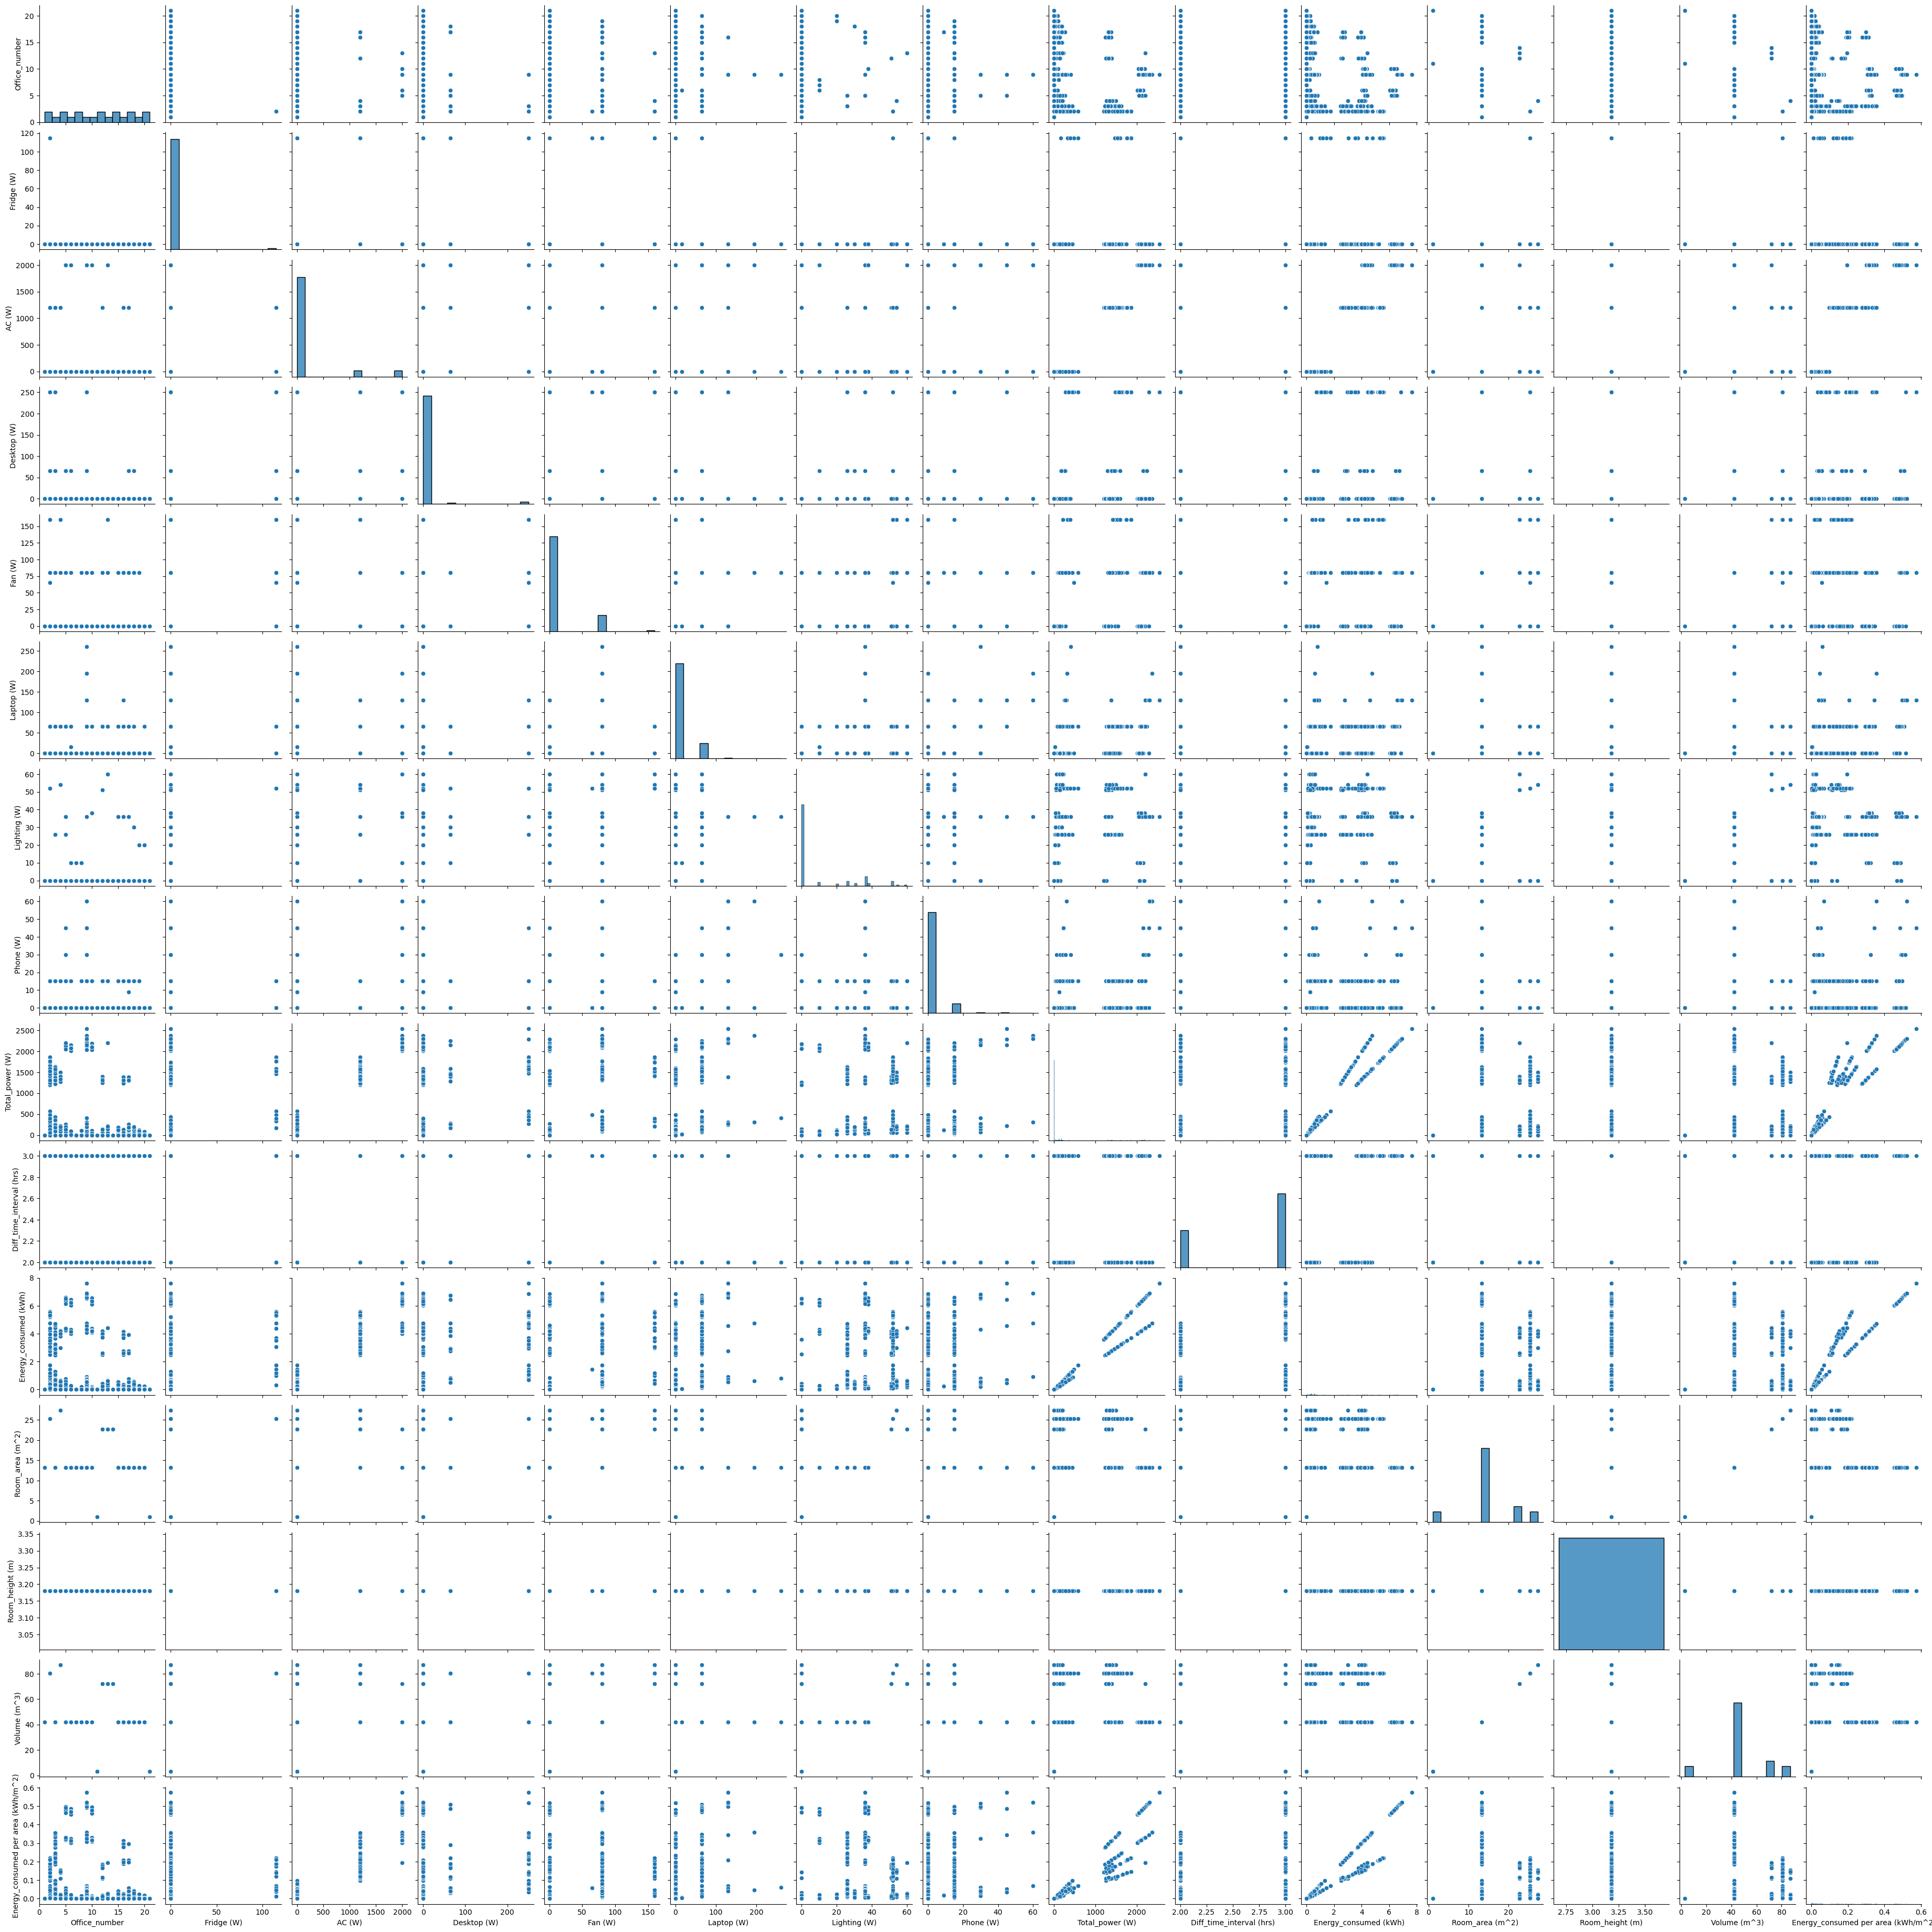

In [19]:
# Variation plot of all variables against respective variable in pre-retrofitted data
sns.pairplot(df) 
plt.show()

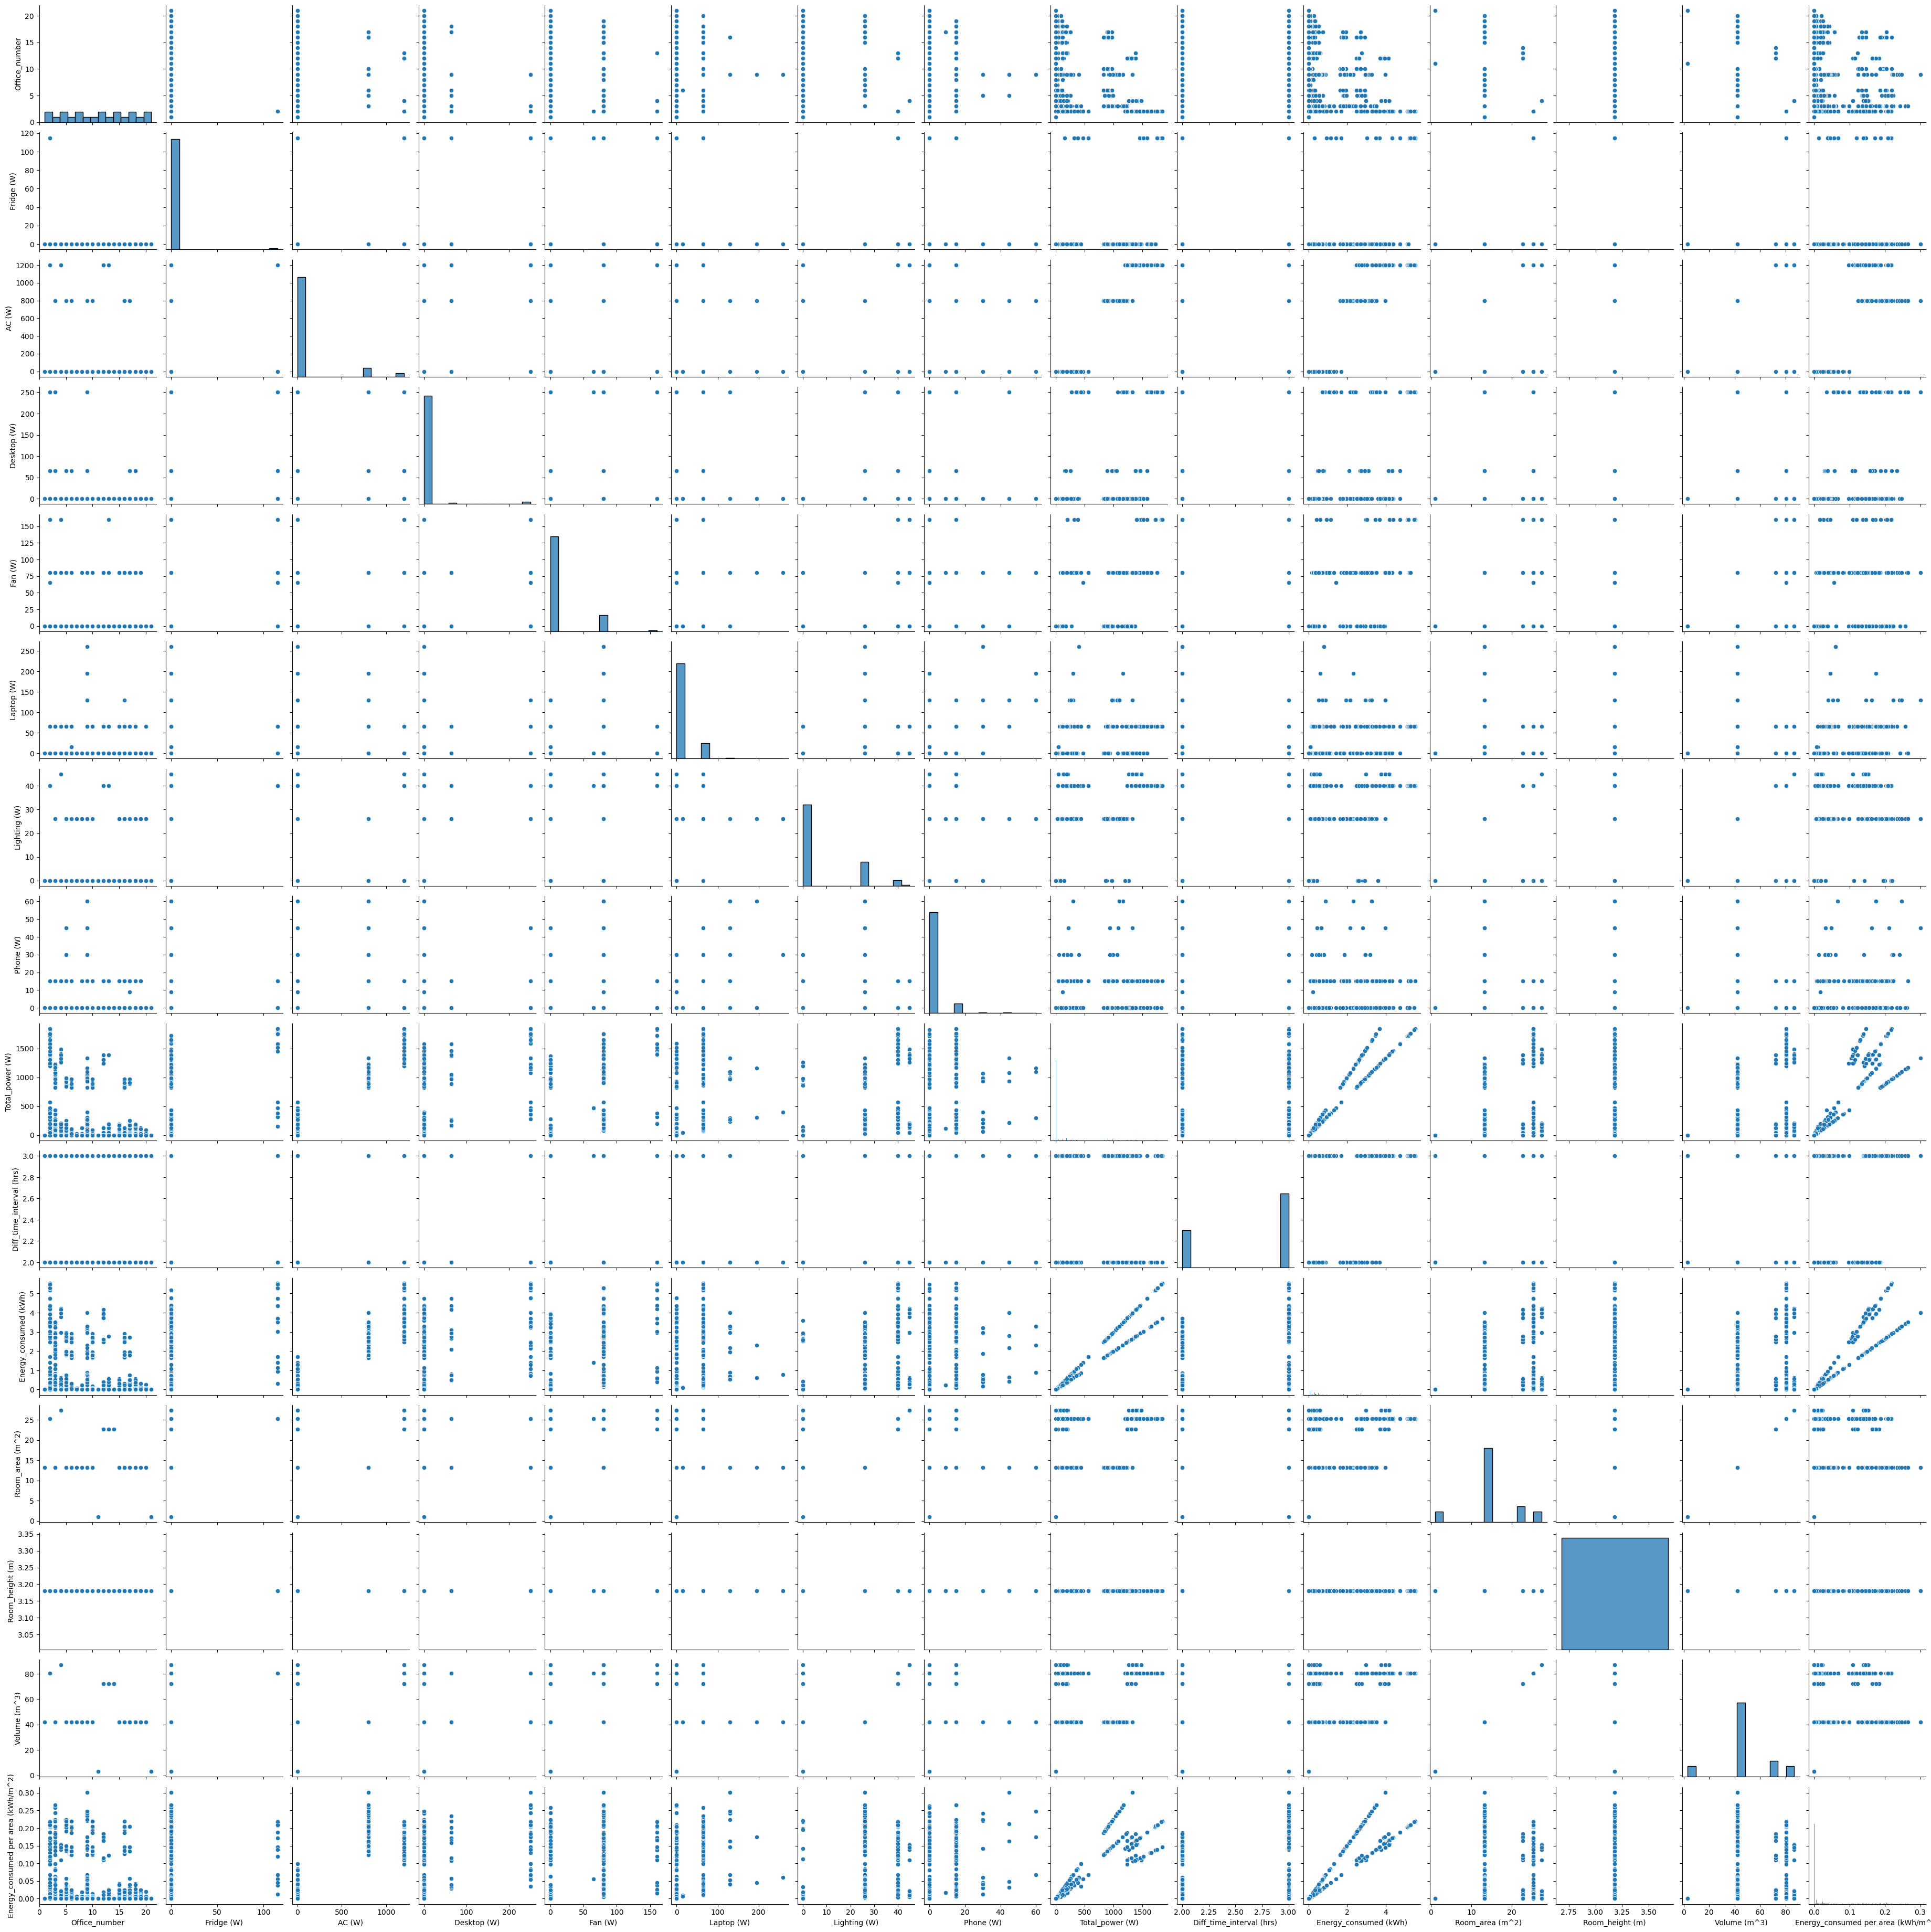

In [20]:
# Variation plot of all variables against respective variable in post-retrofitted data
sns.pairplot(df_rf) 
plt.show()

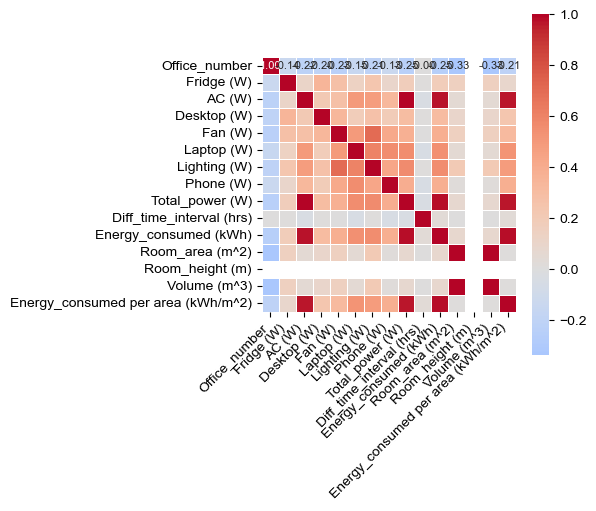

In [21]:
# Check for correlation of pre-retrofitted variables
numerical_df = df.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
correlation = numerical_df.corr()


plt.figure(figsize=(6, 6))  
plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['font.size'] = 10  


heatmap = sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    annot=True,
    annot_kws={'size': 8},  
    fmt=".2f",  # 2 decimal places for correlations
    cmap='coolwarm',  
    center=0,  # Center color map at 0
    square=True,  # Force square cells
    linewidths=0.5,  # Thin grid lines
    linecolor='white',  
    cbar_kws={'shrink': 0.8}  
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation = 45,
    horizontalalignment='right'
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


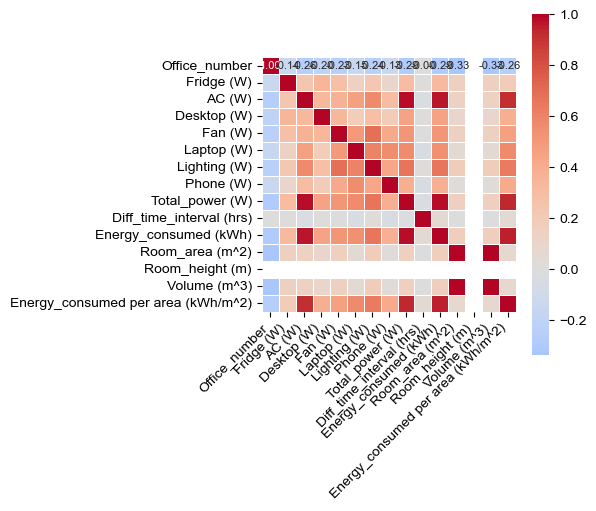

In [22]:
# Check for correlation of post-retrofitted variables
numerical_df = df_rf.select_dtypes(include=['int', 'float'])


correlation = numerical_df.corr()


plt.figure(figsize=(6, 6))  
plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['font.size'] = 10  


heatmap = sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    annot=True,
    annot_kws={'size': 8},  # Smaller annotation font
    fmt=".2f",  # 2 decimal places for correlations
    cmap='coolwarm',  
    center=0,  
    square=True,  # Force square cells
    linewidths=0.5,  # Thin grid lines
    linecolor='white',  
    cbar_kws={'shrink': 0.8}  
)


heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation = 45,
    horizontalalignment='right'
)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


#### Hypothesis-Driven Visualization

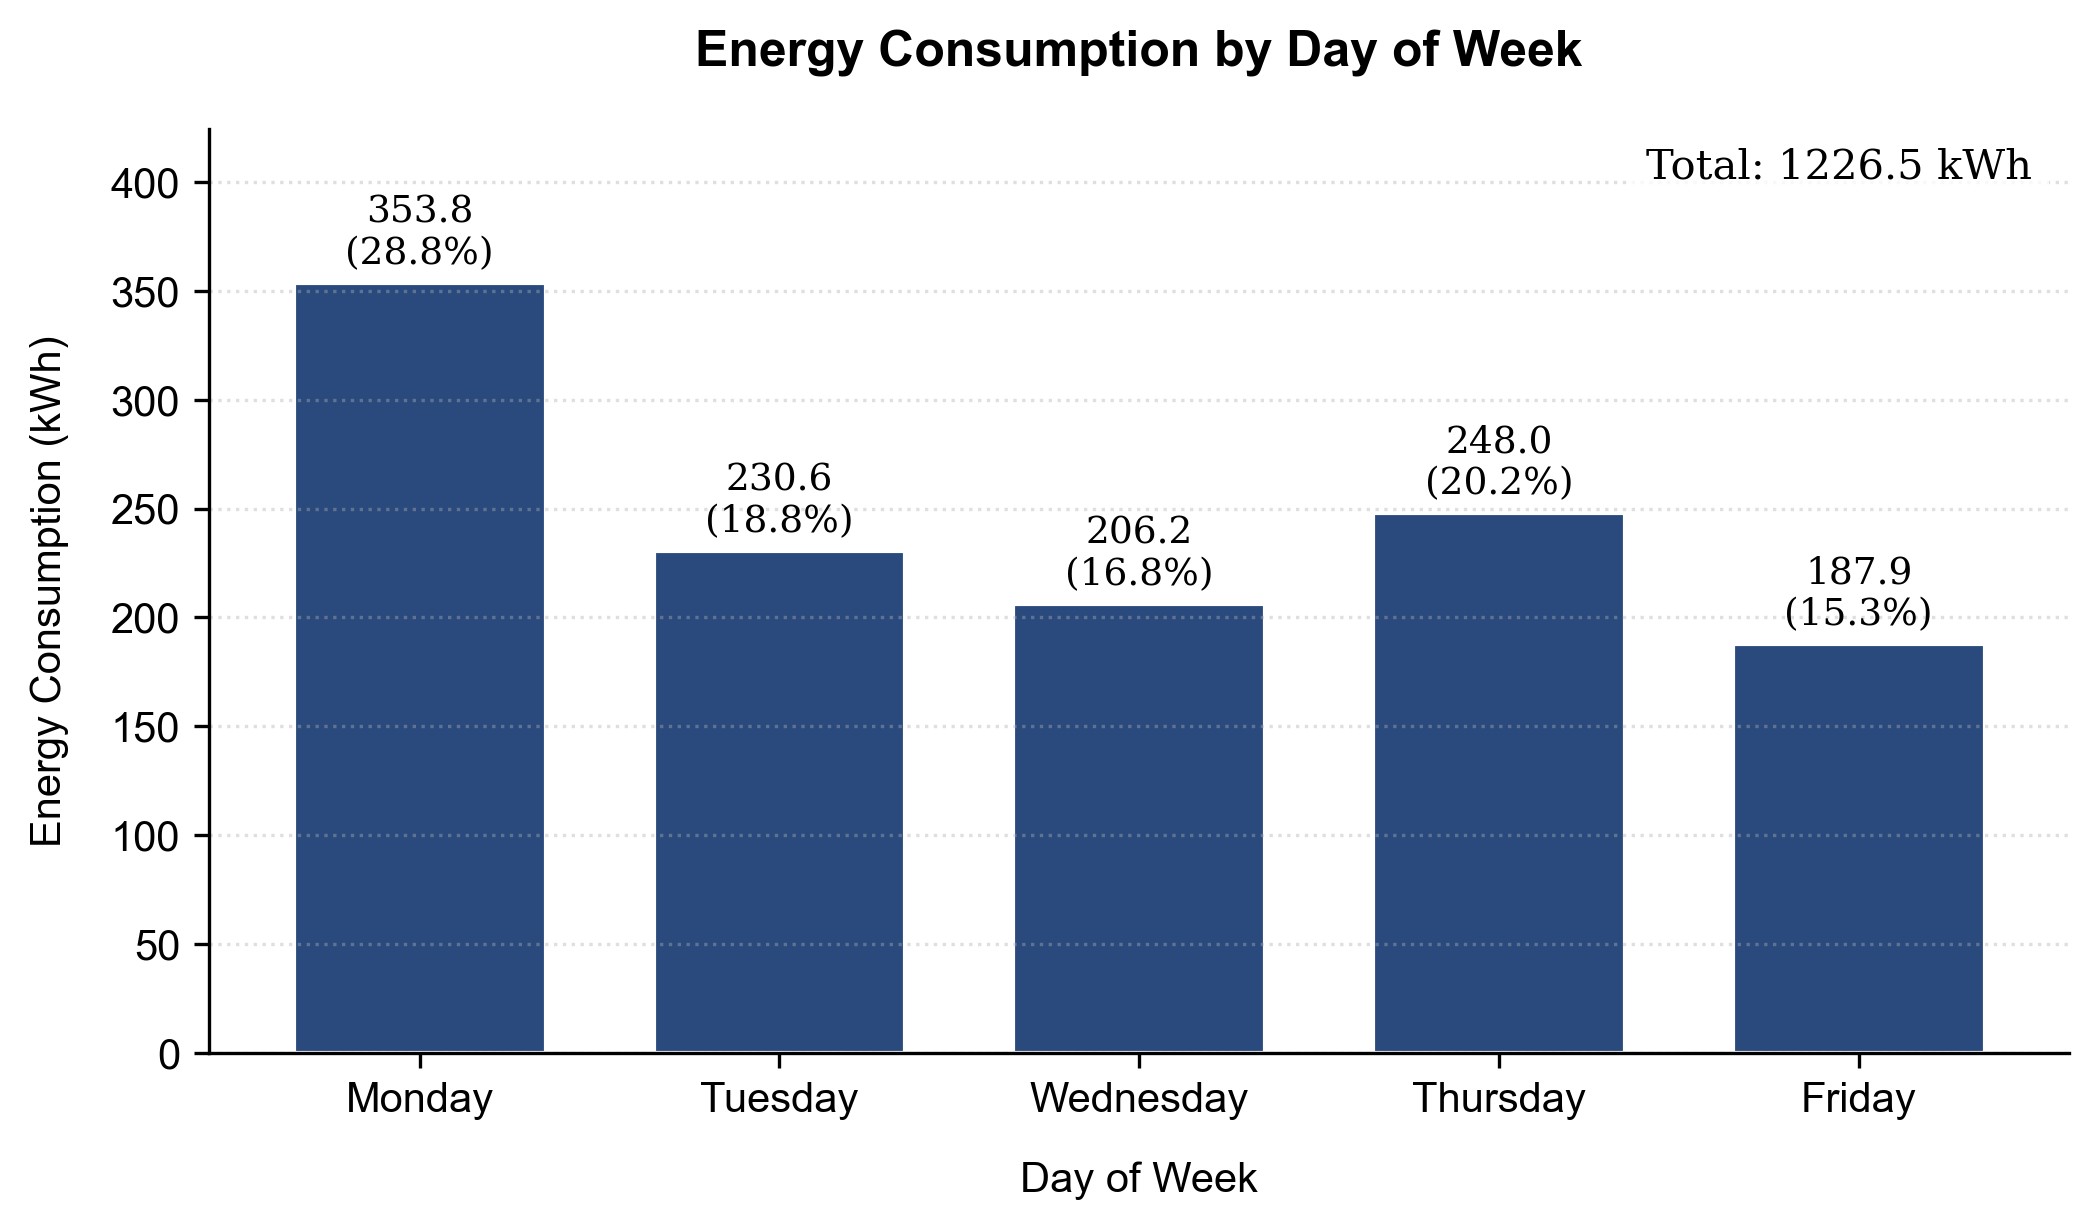

In [ ]:
# Values gotten from SQL query
# Total Energy vs. Days (Pre-retrofitted data)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
energy_kwh = [353.78, 230.55, 206.2, 248.03, 187.93]
total_energy = sum(energy_kwh)


plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'normal'
})


fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
plt.rcParams['font.family'] = 'serif'


bars = ax.bar(days, energy_kwh, 
              color='#2a4a7d',  # Dark blue matching your pie charts
              width=0.7,
              edgecolor='white',
              linewidth=1)

ax.set_title('Energy Consumption by Day of Week', pad=15)
ax.set_xlabel('Day of Week', labelpad=10)
ax.set_ylabel('Energy Consumption (kWh)', labelpad=10)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5,
            f'{height:.1f}\n({height/total_energy:.1%})',
            ha='center', va='bottom',
            fontsize=9, linespacing=1.2)

# Add grid and adjust y-axis
ax.grid(axis='y', linestyle=':', alpha=0.4)
ax.set_ylim(0, max(energy_kwh)*1.2)

# Remove top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add total energy annotation
plt.text(0.98, 0.98, f'Total: {total_energy:.1f} kWh',
         transform=ax.transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()

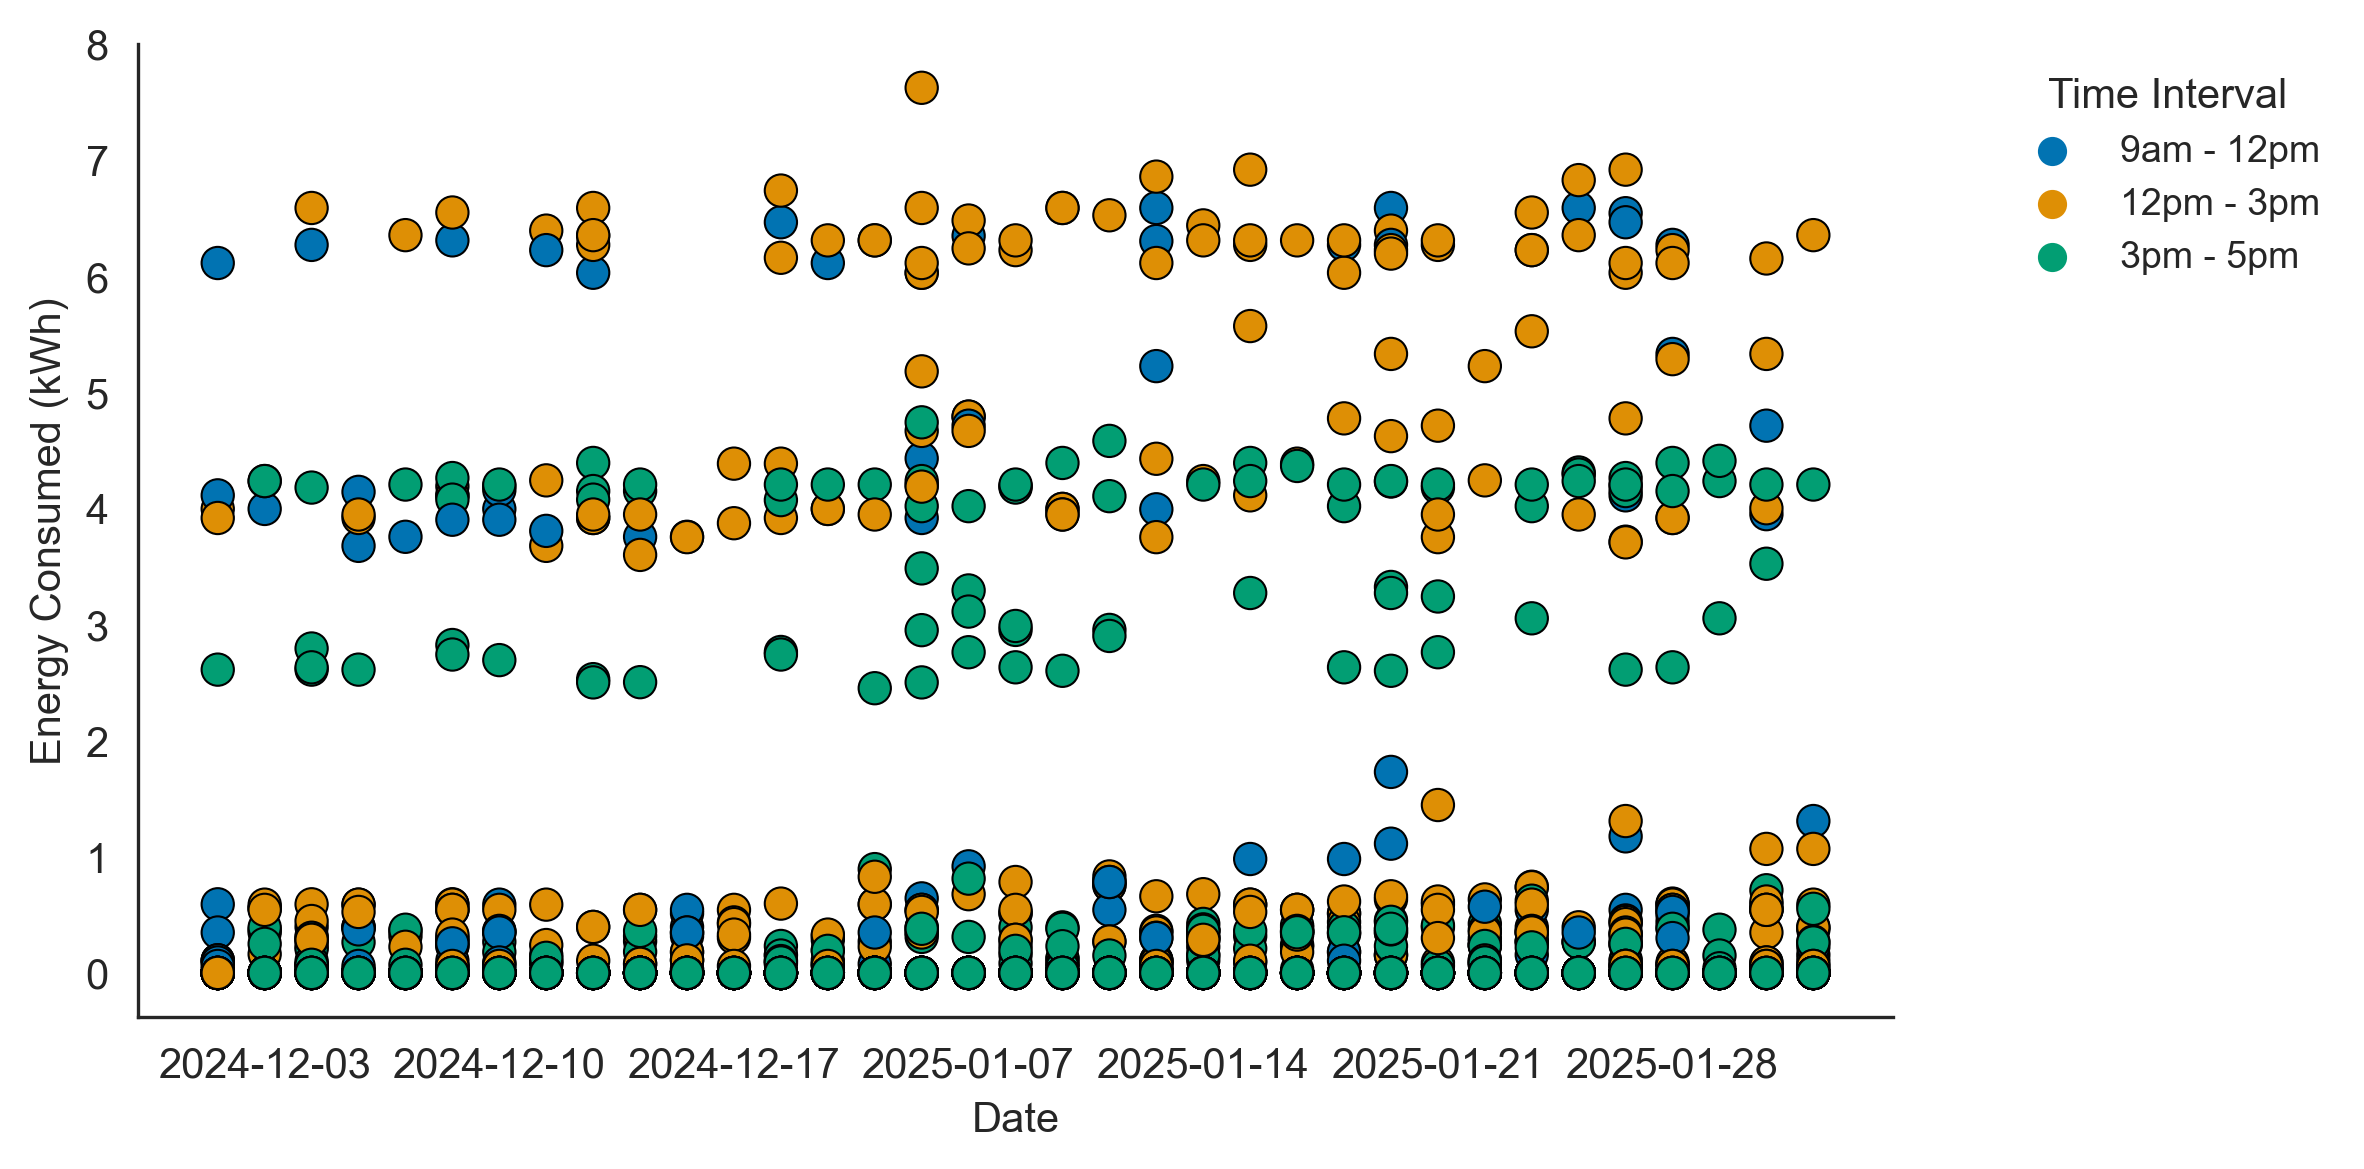

In [ ]:
# Daily time interval trend of energy consumed in building
sns.set_style("white")  

plt.figure(figsize=(8, 4), dpi=300)  
ax = sns.scatterplot(
    data=df,
    x="Date",
    y="Energy_consumed (kWh)",
    hue="Time_interval",
    palette="colorblind",  
    s=60,  
    edgecolor="black",  
    linewidth=0.5,
)

ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Energy Consumed (kWh)", fontsize=10)


plt.legend(
    title="Time Interval",
    bbox_to_anchor=(1.05, 1),  # Outside right of plot
    loc="upper left",
    frameon=False,  # No border
    fontsize=9,
)


ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Weekly ticks
sns.despine()

plt.tight_layout()

plt.show()

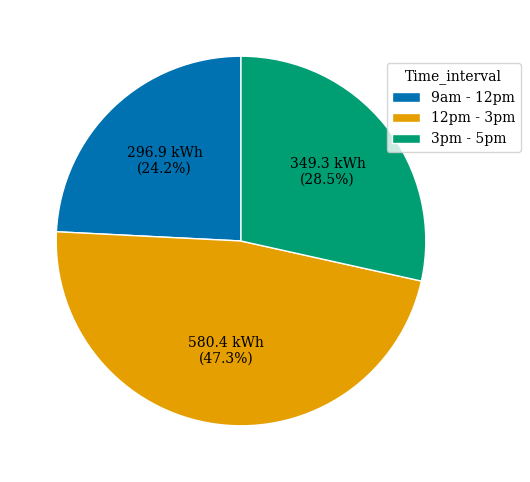

In [ ]:
# Pie Chart of Total Energy Consumed (Pre-retrofitted Data)

# Values gotten from SQL query
days = ['9am - 12pm', '12pm - 3pm', '3pm - 5pm']
energy_kwh = [296.85, 580.36, 349.29]  


colorblind_colors = ['#0072B2', '#E69F00', '#009E73']


plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(  # Capture the returned wedges
    energy_kwh,
    labels=None,
    autopct=lambda p: f'{p * sum(energy_kwh)/100 :.1f} kWh\n({p:.1f}%)',  # Show percentages
    startangle=90,      # Rotate to emphasize largest slice
    colors=colorblind_colors,  # Using the colorblind-friendly palette
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}  # Clean edges
)
plt.legend(
    wedges,  
    days,    
    title="Time_interval",
    loc="upper left",
    bbox_to_anchor=(0.8, 0, 0.7, 0.9)  # Position the legend outside the pie chart
) 
plt.show()

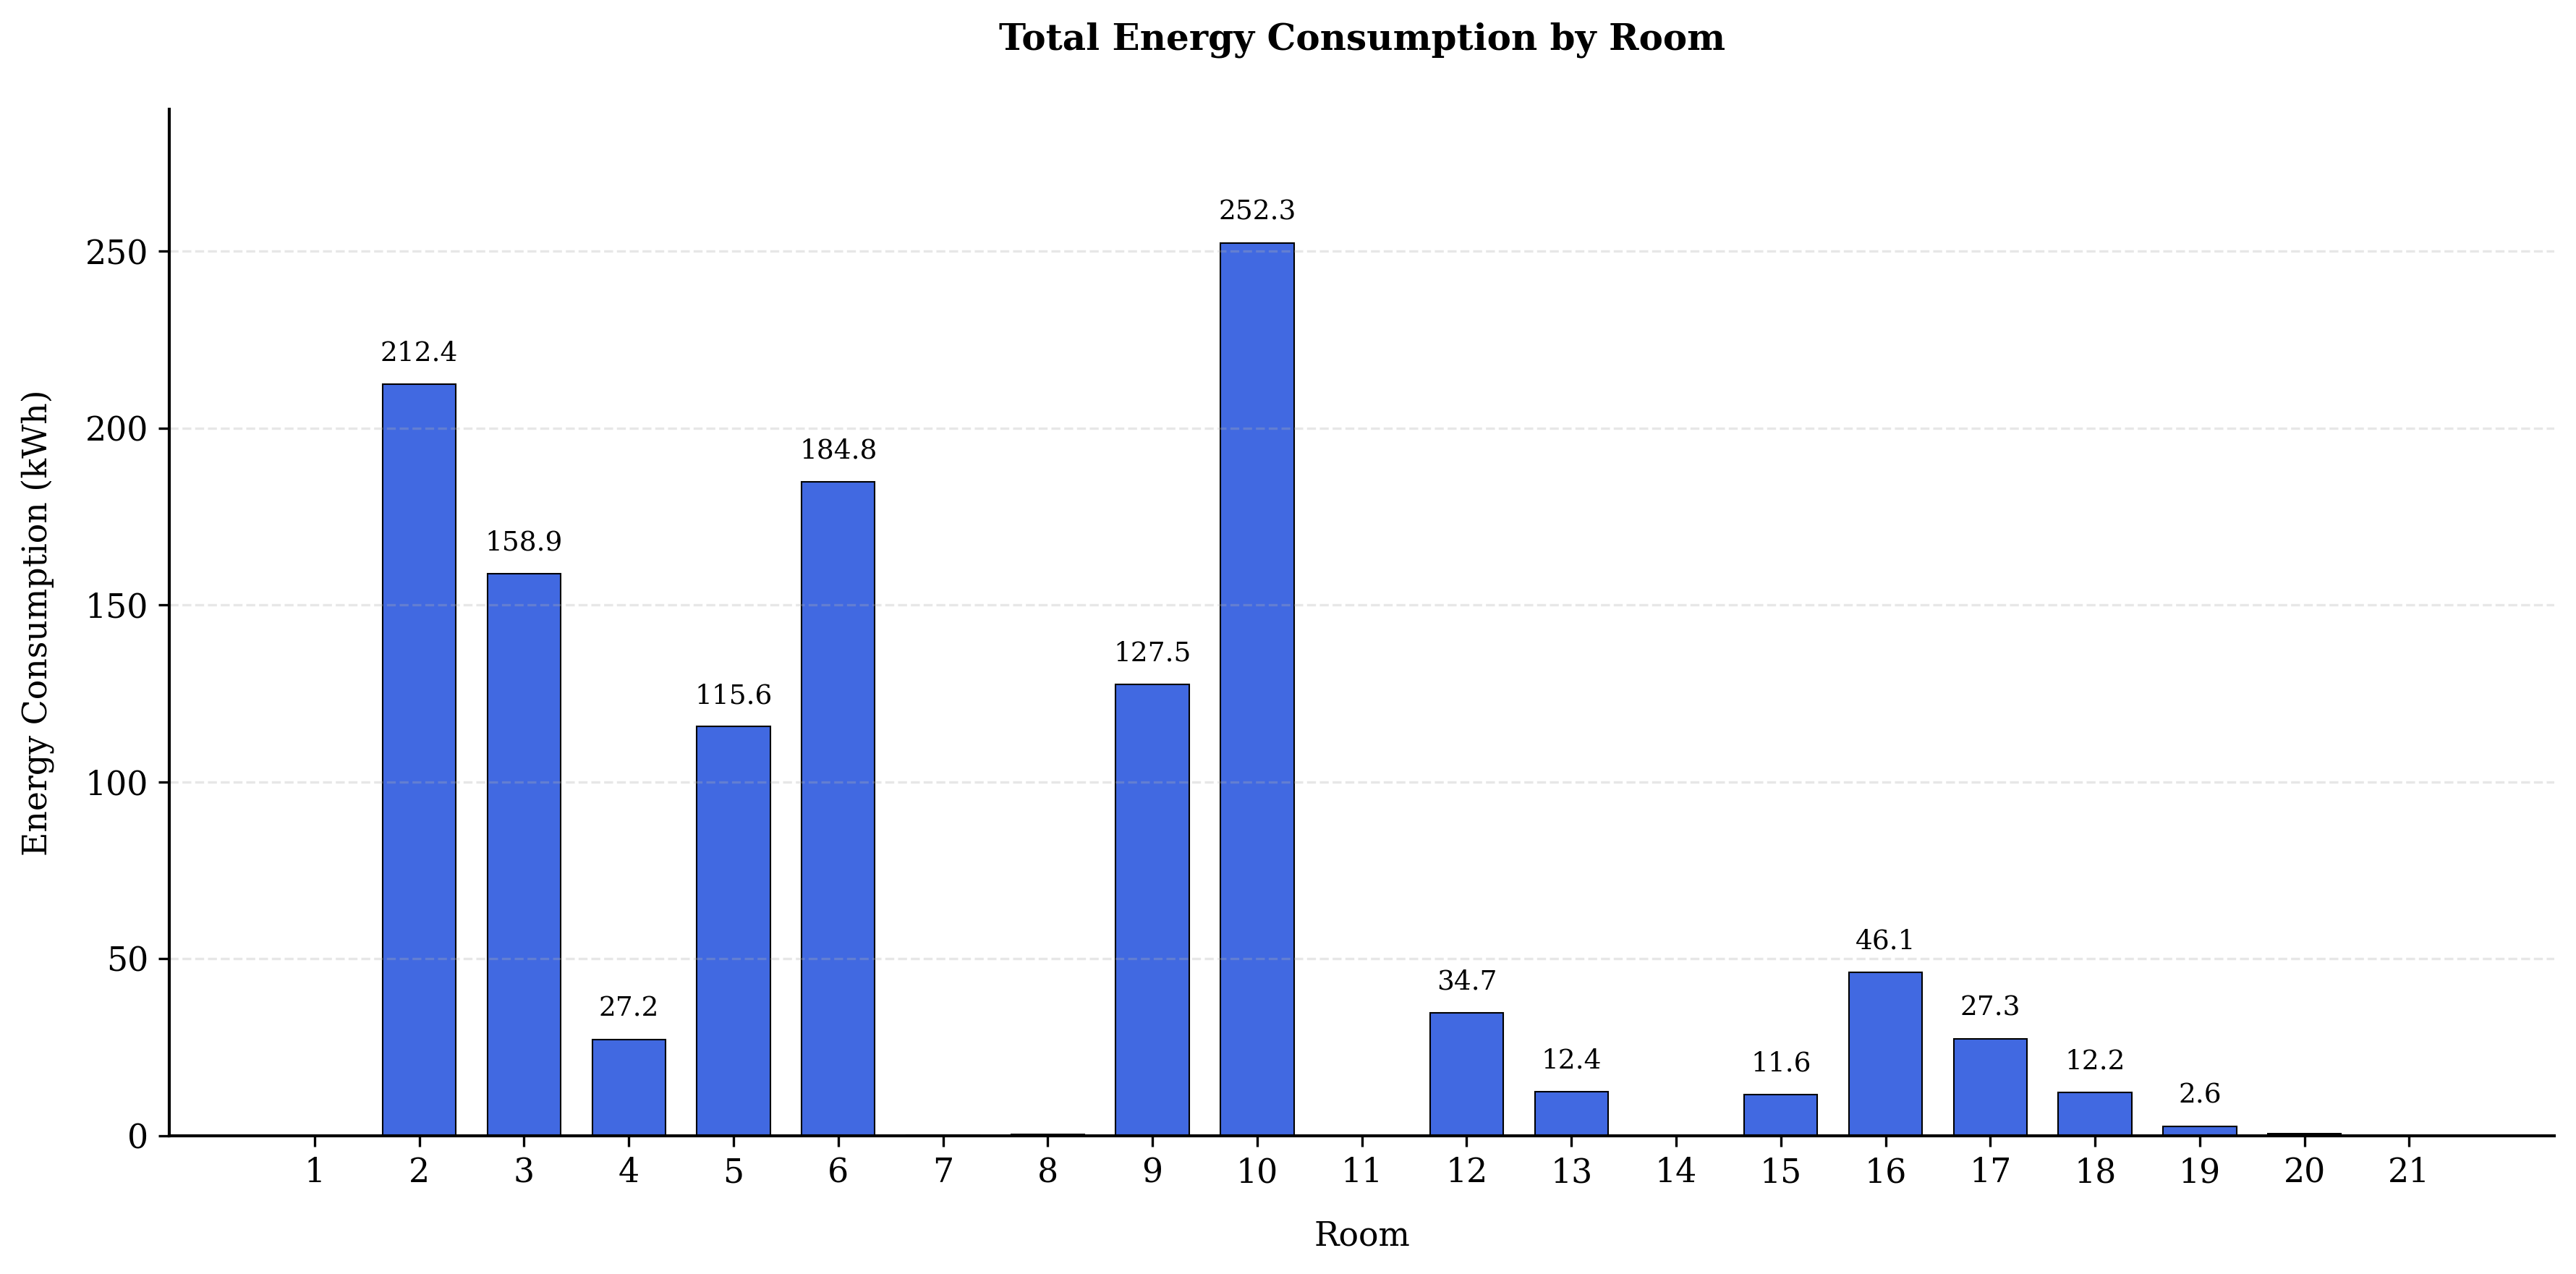

In [41]:
# Total Electricity Use Across Rooms in the Building (Pre-Retrofitted Data)

# Values gotten from SQL query
office = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
          '15', '16', '17', '18', '19', '20', '21']       
sum_energy_kwh = [0, 212.358999475837, 158.87299951911, 27.1849999725819, 
                 115.605000652373, 184.845000231639, 0.0299999993294477, 
                 0.269999992102385, 127.548999220133, 252.265998072922, 0, 
                 34.6810001730919, 12.3899999260902, 0, 11.6399997100234, 
                 46.1160002797842, 27.2689997330308, 12.1949999518692, 
                 2.61000000685453, 0.614999987185001, 0]

plt.figure(figsize=(12, 6), dpi=300)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1

bars = plt.bar(office, sum_energy_kwh, color='royalblue', width=0.7, 
               edgecolor='black', linewidth=0.5)


plt.title("Total Energy Consumption by Room", pad=20, fontweight='bold')
plt.xlabel("Room", labelpad=10)
plt.ylabel("Energy Consumption (kWh)", labelpad=10)


plt.ylim(0, max(sum_energy_kwh)*1.15)

plt.grid(axis='y', linestyle='--', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    if height > 1:  # Only label bars with height > 1 kWh
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, 
                f"{height:.1f}", ha='center', va='bottom', fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()

plt.show()

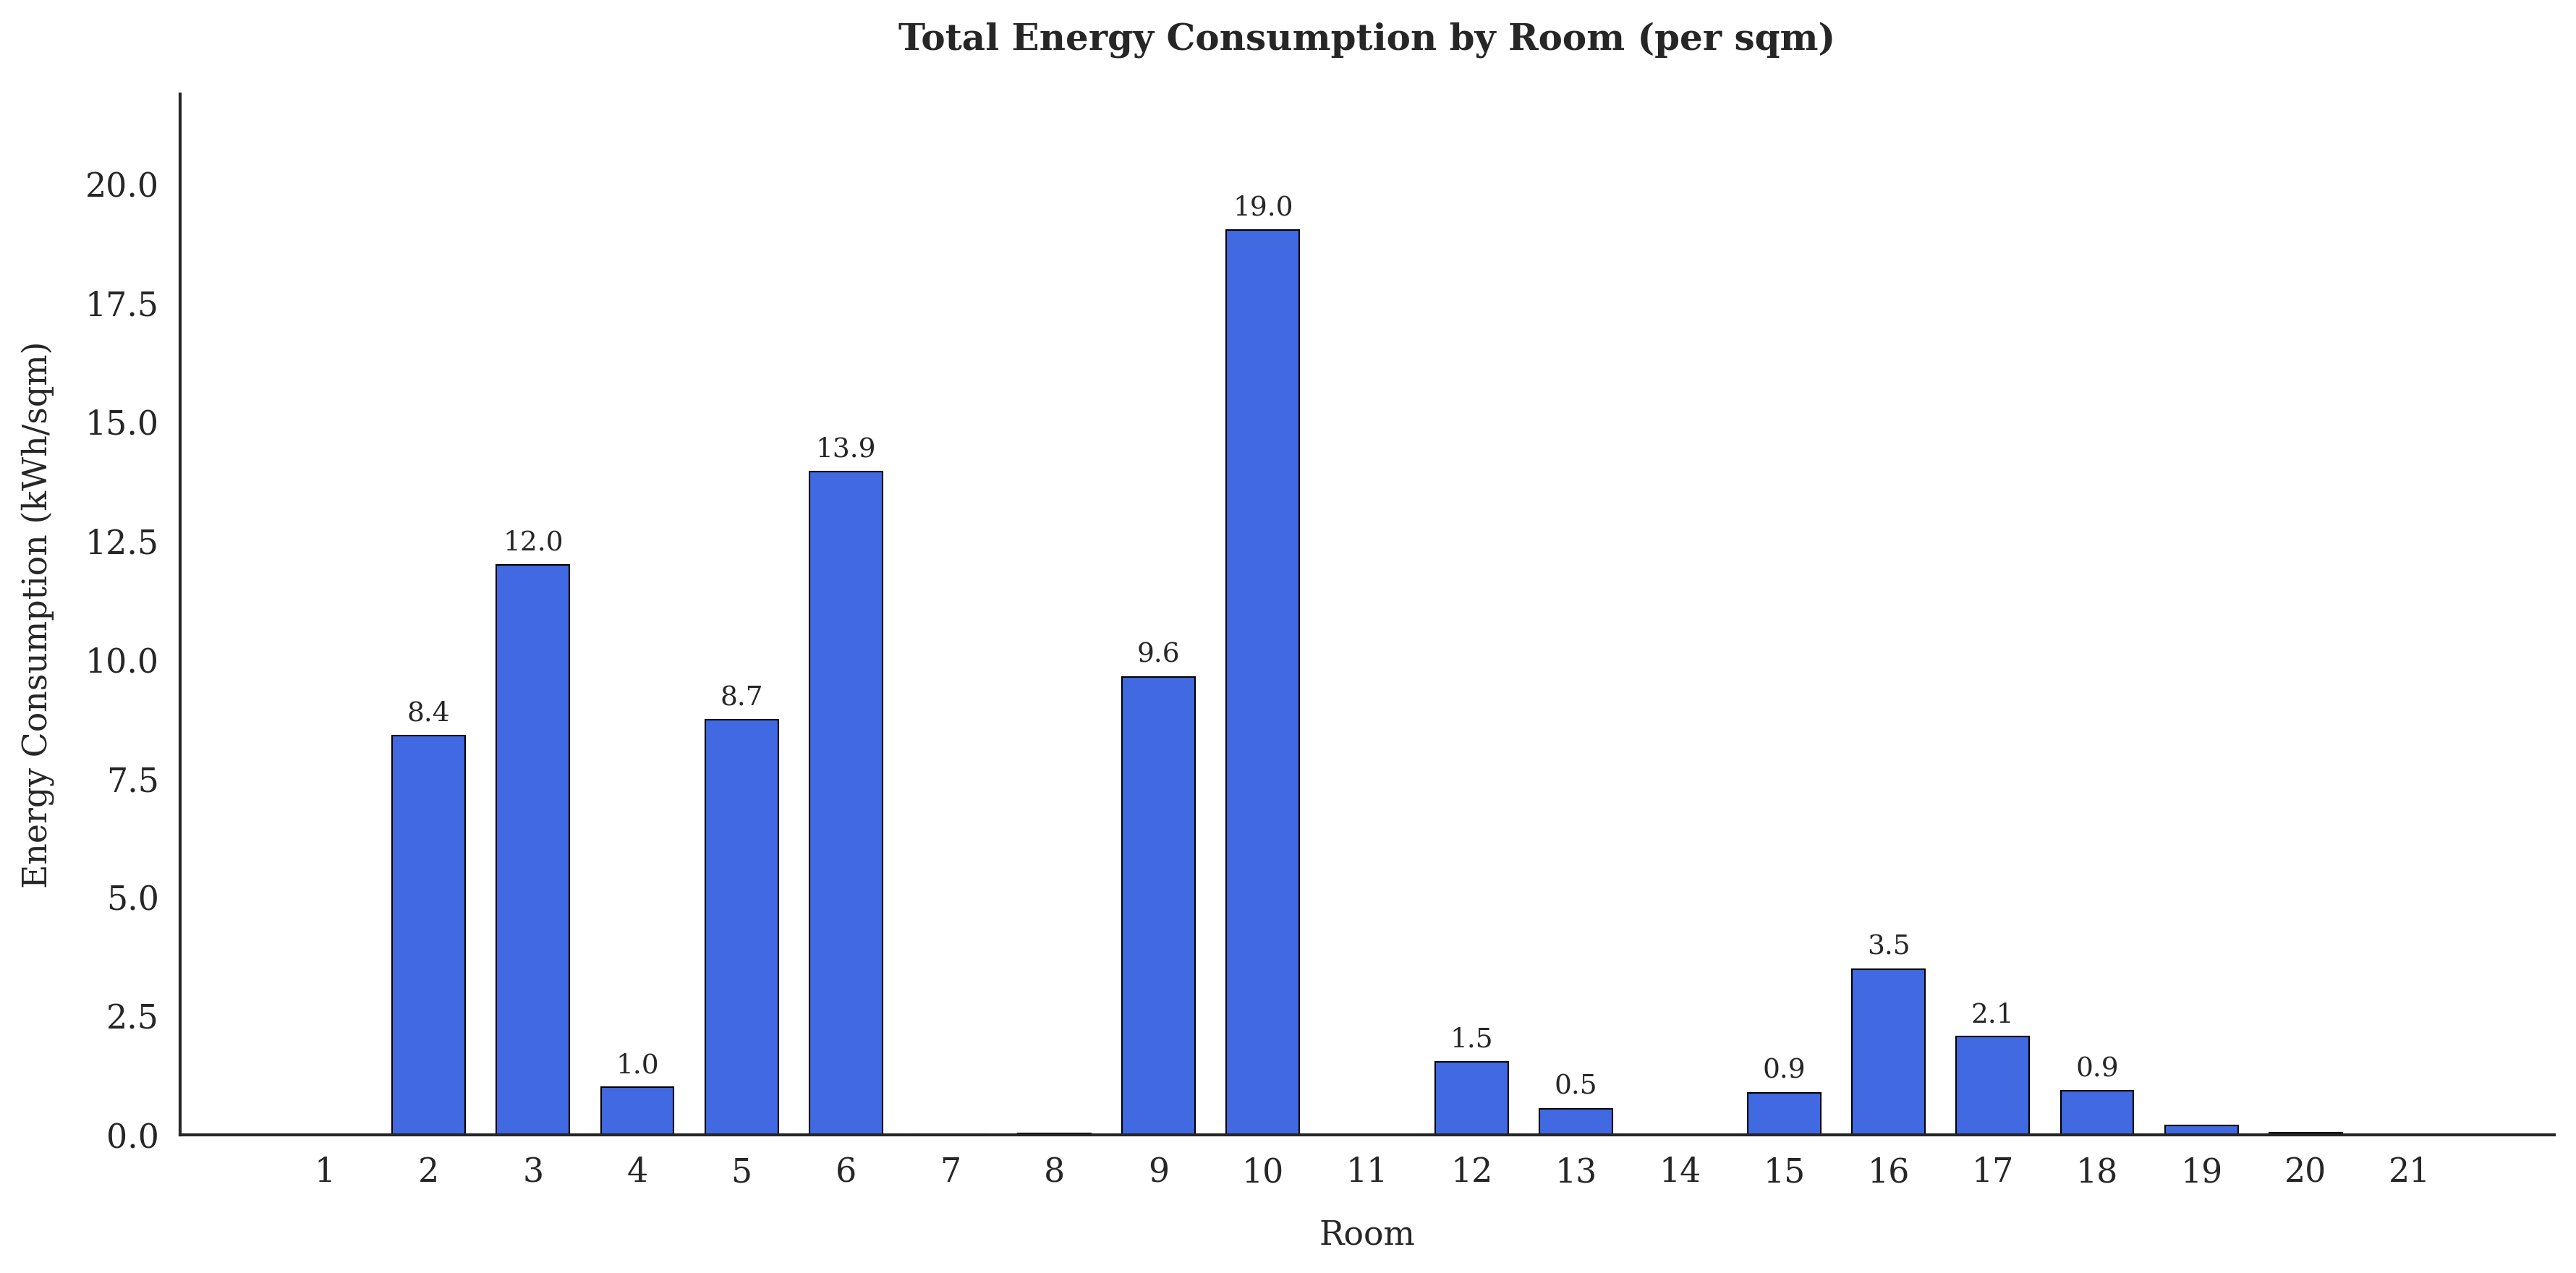

In [ ]:
# Total Electricity per Area Use Across Rooms in the Building (Pre-Retrofitted Data)

# Values gotten from SQL query
office_number = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
                 '13', '14', '15', '16', '17', '18', '19', '20', '21']   
sum_energy_kwh_per_m2 = [0, 8.39363635657355, 11.9813727266155, 0.995422927197069, 
                  8.71832581190392, 13.9400453160051, 0.00226244353689253, 
                  0.0203619920648634, 9.61908002616838, 19.0245853113011, 0, 
                  1.52981913508847, 0.546537270769477, 0, 0.877828075550497, 
                  3.47782811103389, 2.05648572882637, 0.919683276675642, 
                  0.196832586545497, 0.0463800923898816, 0]


plt.figure(figsize=(12, 6), dpi=300)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1


bars = plt.bar(office_number, sum_energy_kwh_per_m2, color='royalblue', width=0.7, 
               edgecolor='black', linewidth=0.5)

plt.title("Total Energy Consumption by Room (per sqm)", pad=15, fontweight='bold')
plt.xlabel("Room", labelpad=10)
plt.ylabel("Energy Consumption (kWh/sqm)", labelpad=10)

# Adjust y-axis to show more detail for lower values
plt.ylim(0, max(sum_energy_kwh_per_m2)*1.15)

# Add grid and value labels only for significant values
for bar in bars:
    height = bar.get_height()
    if height > 0.5:  # Only label bars with height > 0.5
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, 
                f"{height:.1f}", ha='center', va='bottom', fontsize=9)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

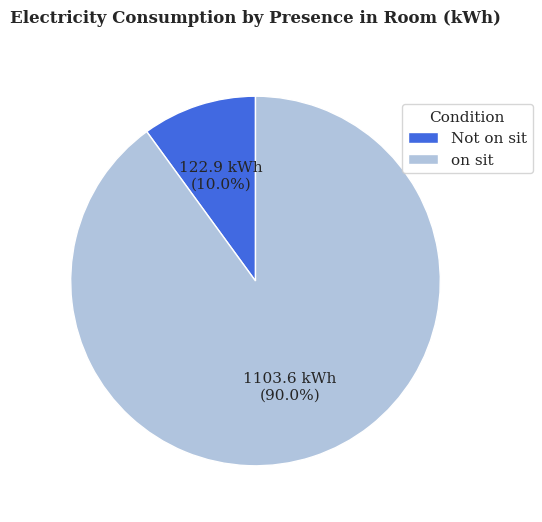

In [ ]:
# Pie Chart of Total Room Electricity Consumption by Presence

condition = ['Not on sit', 'on sit']
energy_kwh = [122.87, 1103.63]  # Values gotten from SQL query
plt.figure(figsize=(6, 6))
plt.pie(
    energy_kwh,
    labels= None,
    autopct=lambda p: f'{p * sum(energy_kwh)/100 :.1f} kWh\n({p:.1f}%)',
    #autopct='%1.1f%%',  # Show percentages
    startangle=90,      
    colors=['royalblue', 'lightsteelblue', 'cornflowerblue'],  # Gradient shades
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}  
)

plt.legend( 
    condition,    # The labels for each wedge
    title="Condition",
    loc="upper left",
    bbox_to_anchor=(0.8, 0, 0.7, 0.9)  # Position the legend outside the pie chart
) 


plt.title("Electricity Consumption by Presence in Room (kWh)", pad=20)
plt.show()


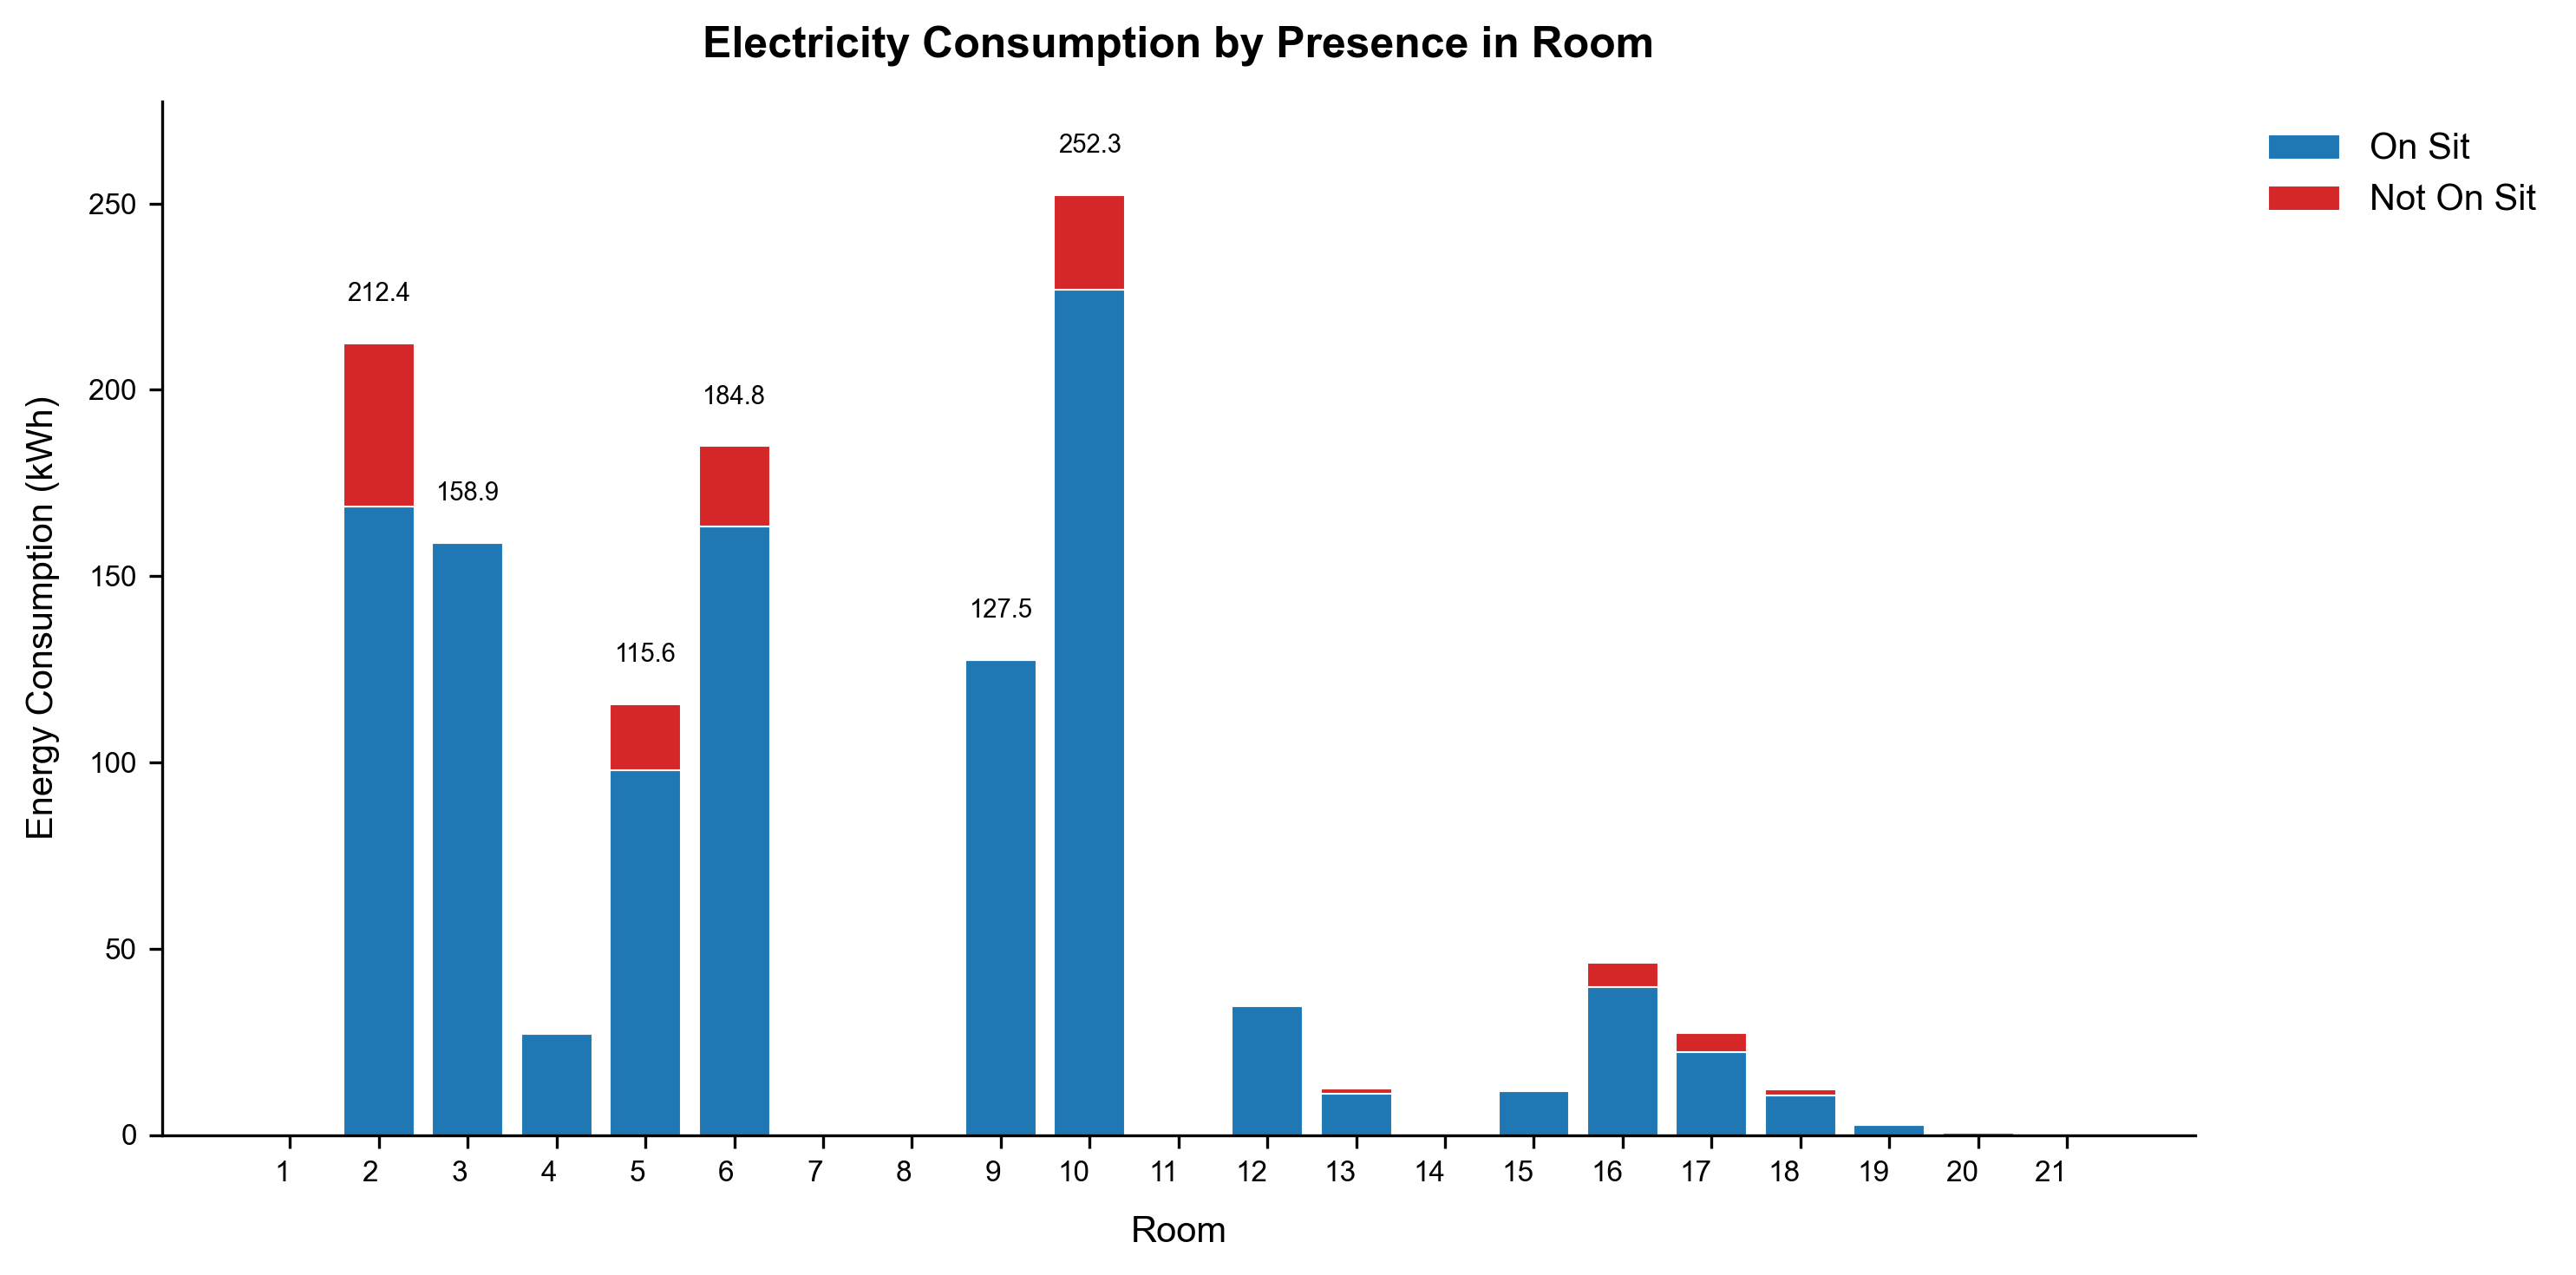

In [30]:
# Sum of Electricity Consumption by Presence in Rooms 

offices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
on_sit = [0, 168.60, 158.87, 27.18, 97.88, 163.29, 0.03, 0.27, 127.55, 226.79, 0, 34.68,
           11.11, 0, 11.64, 39.67, 22.2, 
          10.64, 2.61, 0.61, 0] # Values from SQL query (Pre-Retrofitted Data)
not_on_sit = [0, 43.76, 0, 0, 17.72, 21.56, 0, 0, 0, 25.48, 0, 0, 1.28, 0, 0, 6.45, 
              5.07, 1.56, 0, 0, 0] # Values from SQL query (Pre-Retrofitted)
 

plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.grid.axis': 'y',
    'grid.linestyle': '--',
    'grid.alpha': 0.3
})


fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

bar_width = 0.8
x = np.arange(len(offices))
colors = ['#1f77b4', '#d62728']  # Blue for on-sit, red for not-on-sit

bottom_bars = ax.bar(x, on_sit, width=bar_width, color=colors[0], 
                    edgecolor='white', linewidth=0.5,
                    label='On Sit')
top_bars = ax.bar(x, not_on_sit, width=bar_width, color=colors[1], 
                 bottom=on_sit, edgecolor='white', linewidth=0.5,
                 label='Not On Sit')


ax.set_title('Electricity Consumption by Presence in Room', pad=12, weight='bold')
ax.set_xlabel('Room', labelpad=8)
ax.set_ylabel('Energy Consumption (kWh)', labelpad=8)


ax.set_xticks(x)
ax.set_xticklabels(offices)
plt.xticks(rotation=0, ha='right')


max_value = max(np.array(on_sit) + np.array(not_on_sit))
ax.set_ylim(0, max_value * 1.1)  # 10% headroom
ax.spines[['top', 'right']].set_visible(False)


ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc='upper left')

# Label significant values of bars (>100 kWh)
for i, (on, off) in enumerate(zip(on_sit, not_on_sit)):
    total = on + off
    if total > 100:
        ax.text(x[i], total + 10, f'{total:.1f}', 
               ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

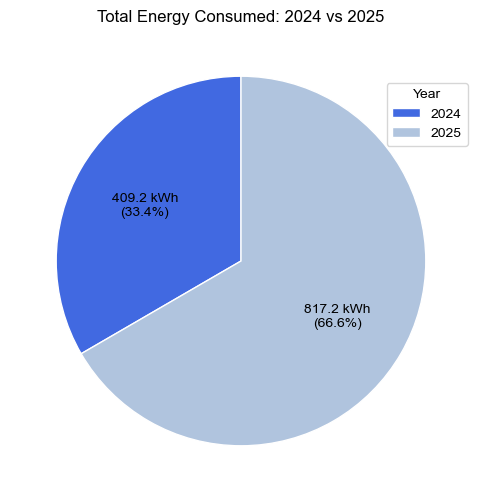

In [31]:
# Pie Chart of Total Electricity Consumption by Year

year = ['2024', '2025']
energy_kwh = [409.25, 817.24]  # Values gotten from SQL Query

plt.figure(figsize=(6, 6))
plt.title('Total Energy Consumed: 2024 vs 2025')
plt.pie(
    energy_kwh,
    labels=None,
    autopct=lambda p: f'{p * sum(energy_kwh)/100 :.1f} kWh\n({p:.1f}%)',
    startangle=90,
    colors=['royalblue', 'lightsteelblue'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.legend(
    year,    
    title="Year",
    loc="upper left",
    bbox_to_anchor=(0.8, 0, 0.7, 0.9)  # Position the legend outside the pie chart
)

plt.show()

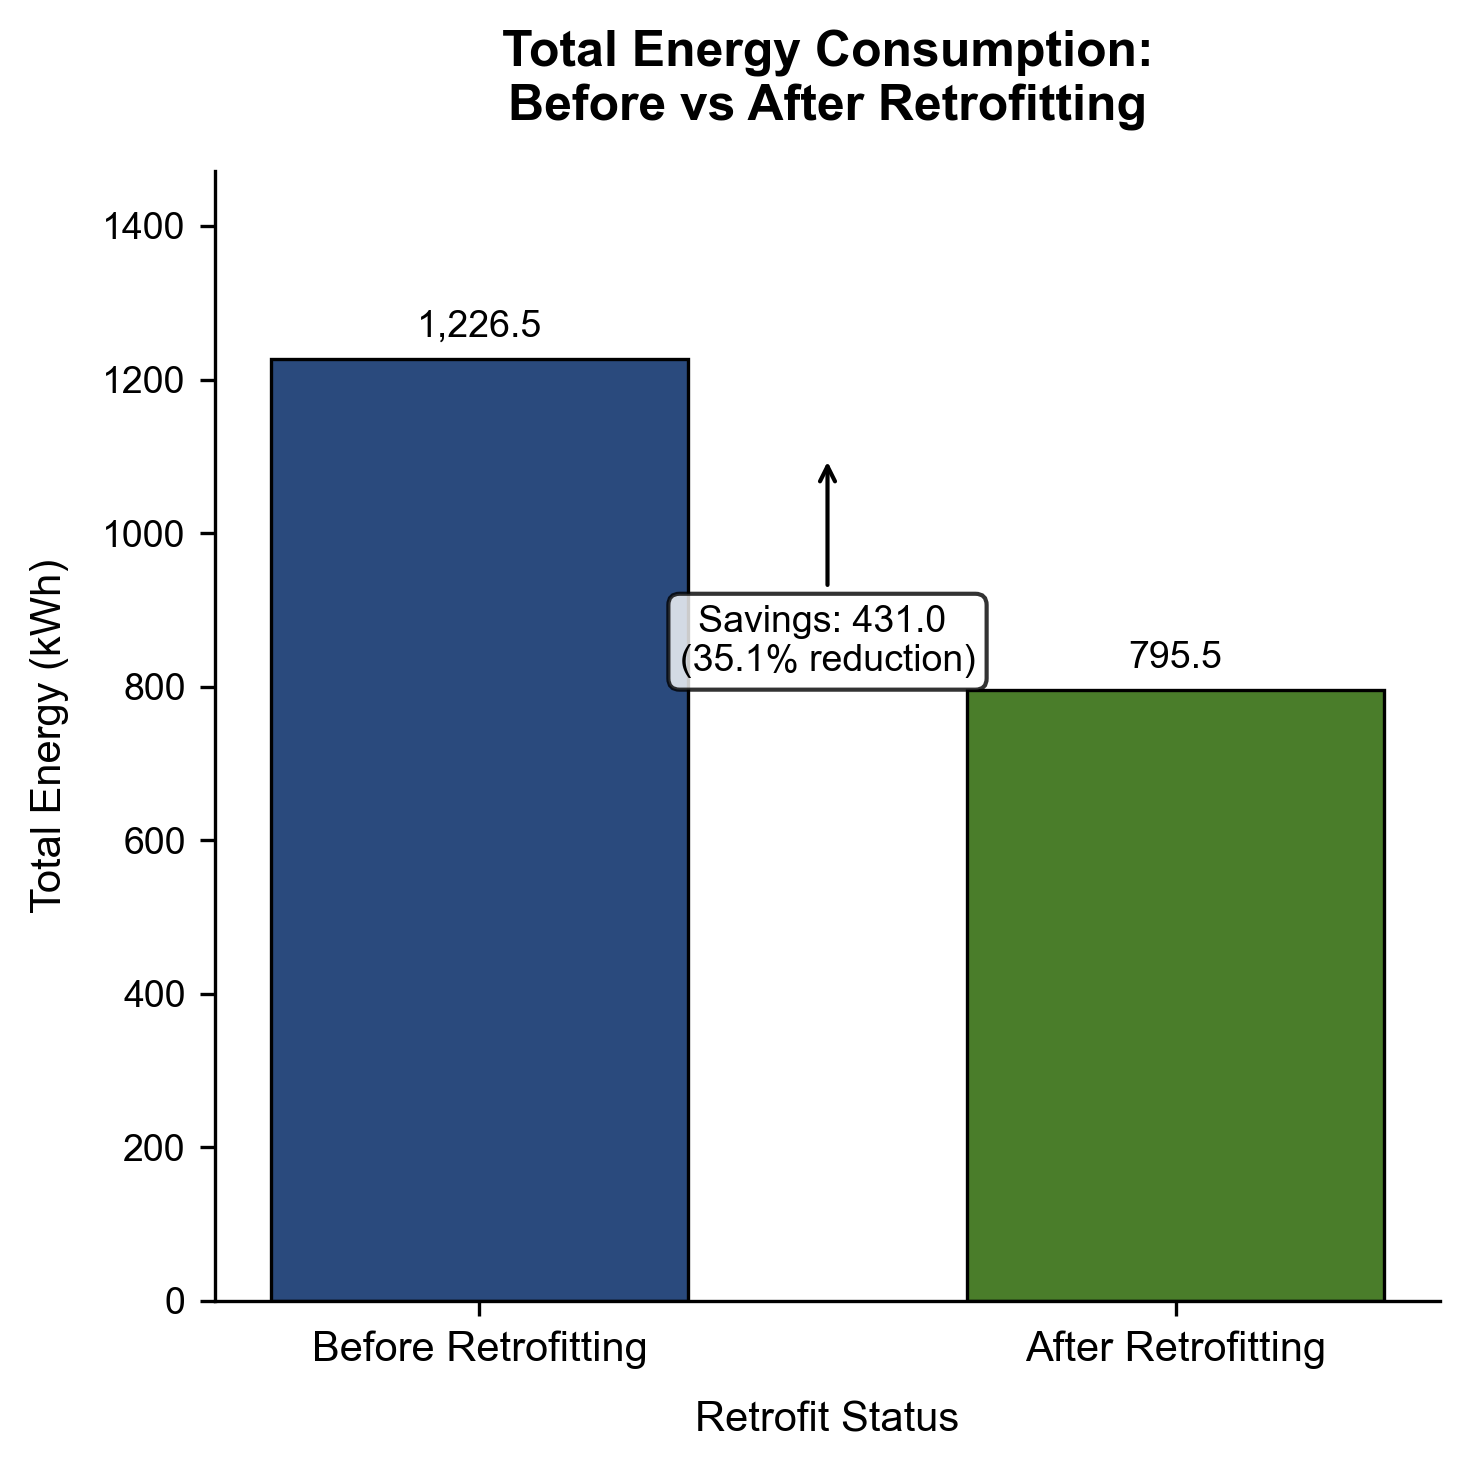

In [32]:
# Total Pre-retrofitteed and post-retrofitted energy usage 

categories = ('Before Retrofitting', 'After Retrofitting')
energy_values = (1226.5, 795.47) # Gotten from SQL query
savings = energy_values[0] - energy_values[1]
savings_percentage = (savings / energy_values[0]) * 100

plt.style.use('default')  
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 9,
    'axes.grid': False,
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False
})


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)


colors = ['#2a4a7d', '#4a7d2a']  
bars = ax.bar(categories, energy_values, width=0.6, 
             color=colors, edgecolor='black', linewidth=0.8)

ax.set_title('Total Energy Consumption:\nBefore vs After Retrofitting', pad=12, weight='bold')
ax.set_xlabel('Retrofit Status', labelpad=8)
ax.set_ylabel('Total Energy (kWh)', labelpad=8)

ax.set_ylim(0, max(energy_values)*1.2)

# Value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 20,
           f'{height:,.1f}',
           ha='center', va='bottom', fontsize=9)


ax.annotate(f'Savings: {savings:,.1f} \n({savings_percentage:.1f}% reduction)',
           xy=(0.5, max(energy_values)*0.9),
           xytext=(0.5, max(energy_values)*0.7),
           ha='center', va='center',
           fontsize=9,
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
           arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

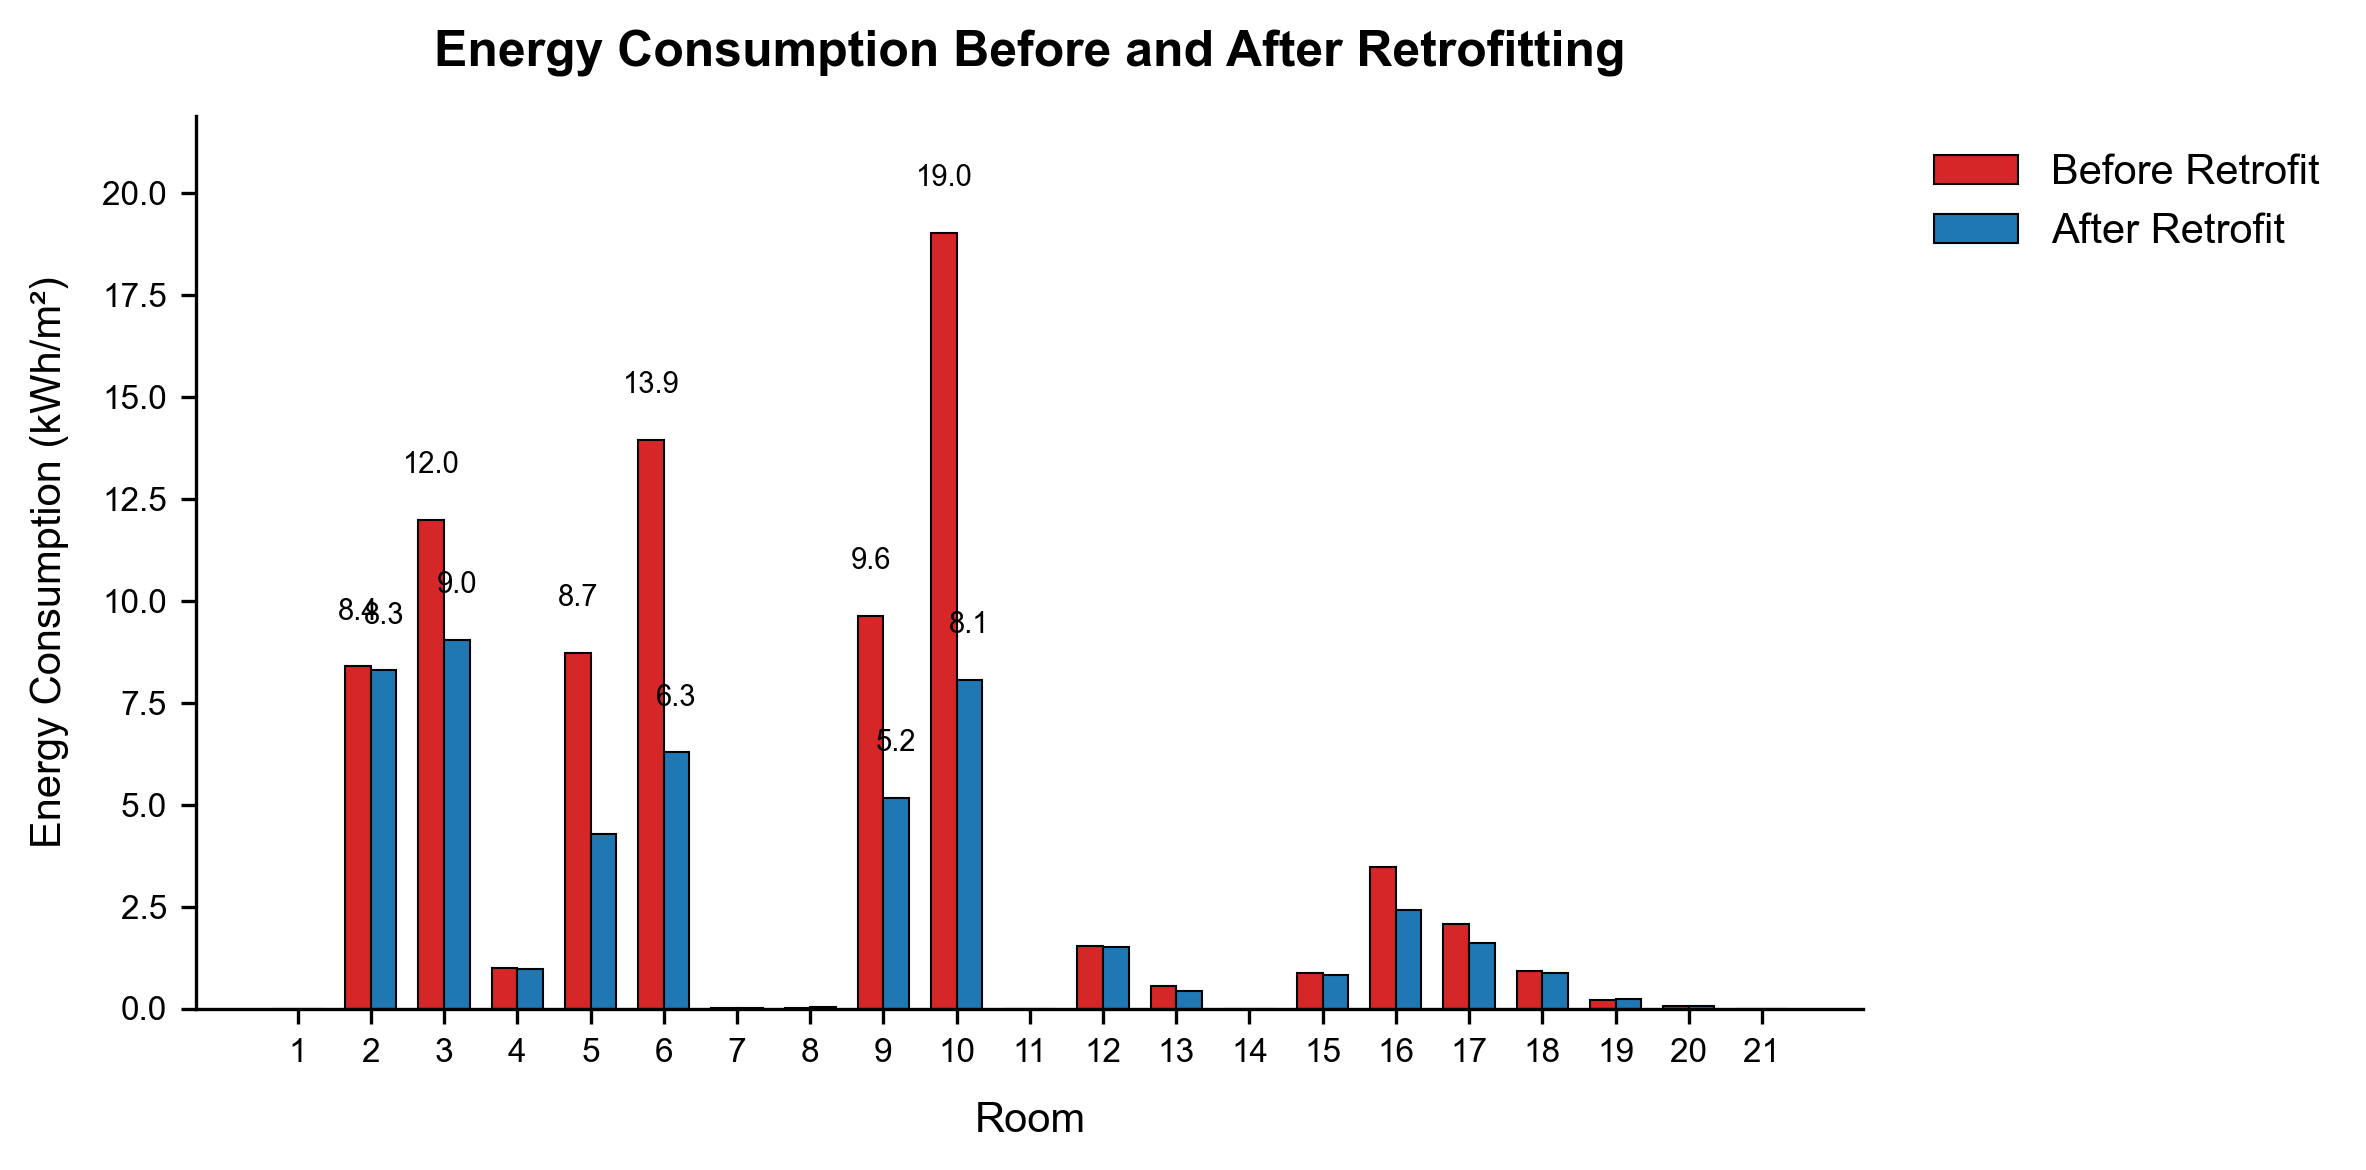

In [ ]:
# Energy consumption in rooms before and after retrofitting

office_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                  21] # Values gotten from SQL
total_energy_consumed = [0.00, 8.39, 11.98, 1, 8.72, 13.94, 0.0023, 0.0204, 9.62, 19.02, 
                         0.00, 1.53, 0.55,
                          0.00, 0.88, 
                        3.48, 2.06, 0.92, 0.20, 0.05, 0.00] # Values gotten from SQL
possible_retrofit_energy = [0.00, 8.29, 9.03, 0.98, 4.27, 6.28, 0.01, 0.03, 5.17, 8.05,
                             0.00, 1.51, 0.43, 0.00, 0.82, 
                          2.41, 1.60, 0.88, 0.23, 0.06, 0.00] # Values gotten from SQL


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8


fig, ax = plt.subplots(figsize=(8, 4), dpi=300)  # Adjusted width to accommodate 21 offices

# Plot parameters
bar_width = 0.35
x = np.arange(len(office_number))

# Plot bars with improved colors and edges
before_bars = ax.bar(x - bar_width/2, total_energy_consumed, width=bar_width, 
                    color='#d62728', edgecolor='black', linewidth=0.5,
                    label='Before Retrofit')
after_bars = ax.bar(x + bar_width/2, possible_retrofit_energy, width=bar_width,
                   color='#1f77b4', edgecolor='black', linewidth=0.5,
                   label='After Retrofit')


ax.set_title('Energy Consumption Before and After Retrofitting', pad=12, weight='bold')
ax.set_xlabel('Room', labelpad=8)
ax.set_ylabel('Energy Consumption (kWh/m²)', labelpad=8)


ax.set_xticks(x)
ax.set_xticklabels(office_number)
ax.set_ylim(0, max(total_energy_consumed)*1.15)  # 15% headroom
# ax.yaxis.grid(False, linestyle='--', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)  # Cleaner look

# Legend (moved outside)
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc='upper left')

# Add value labels for notable bars (only show values > 5 for clarity)
for bars in [before_bars, after_bars]:
    for bar in bars:
        height = bar.get_height()
        if height >= 5:  # Only label significant values
            ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                   f'{height:.1f}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

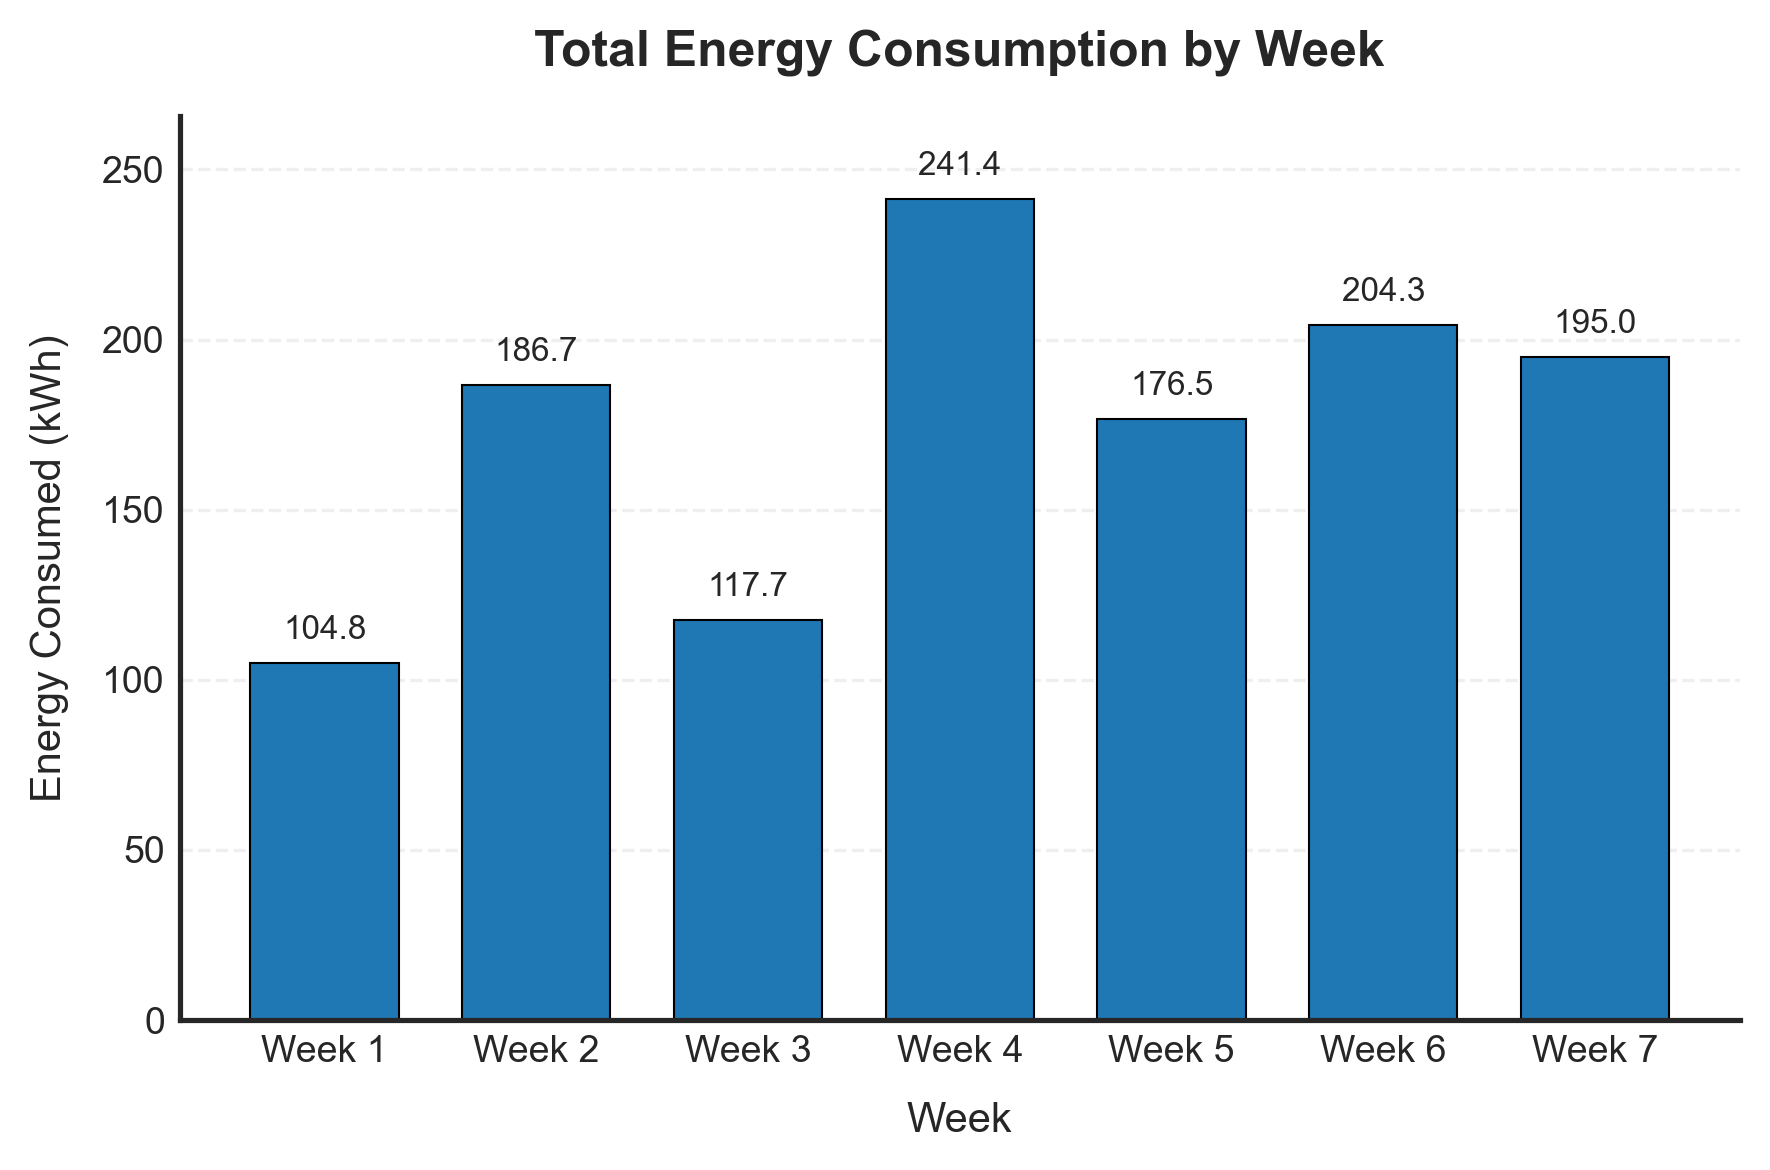

In [38]:
# Weekly total energy consumed before retrofitting
week_numbers = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7']
total_energy_consumed = [104.84, 186.72, 117.69, 241.42, 176.54, 204.30, 194.98]

plt.style.use('seaborn-v0_8-white')  
plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12


fig, ax = plt.subplots(figsize=(6, 4), dpi=300)  

bars = ax.bar(
    week_numbers, 
    total_energy_consumed, 
    color='#1f77b4',  
    edgecolor='black', 
    linewidth=0.5,
    width=0.7  
)


ax.set_title("Total Energy Consumption by Week", pad=12, weight='bold')
ax.set_xlabel("Week", labelpad=8)
ax.set_ylabel("Energy Consumed (kWh)", labelpad=8)


ax.tick_params(axis='both', labelsize=9)
ax.set_ylim(0, max(total_energy_consumed) * 1.1)  
ax.yaxis.grid(True, linestyle='--', alpha=0.3) 
ax.spines[['top', 'right']].set_visible(False)  # Remove top/right borders


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,  
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

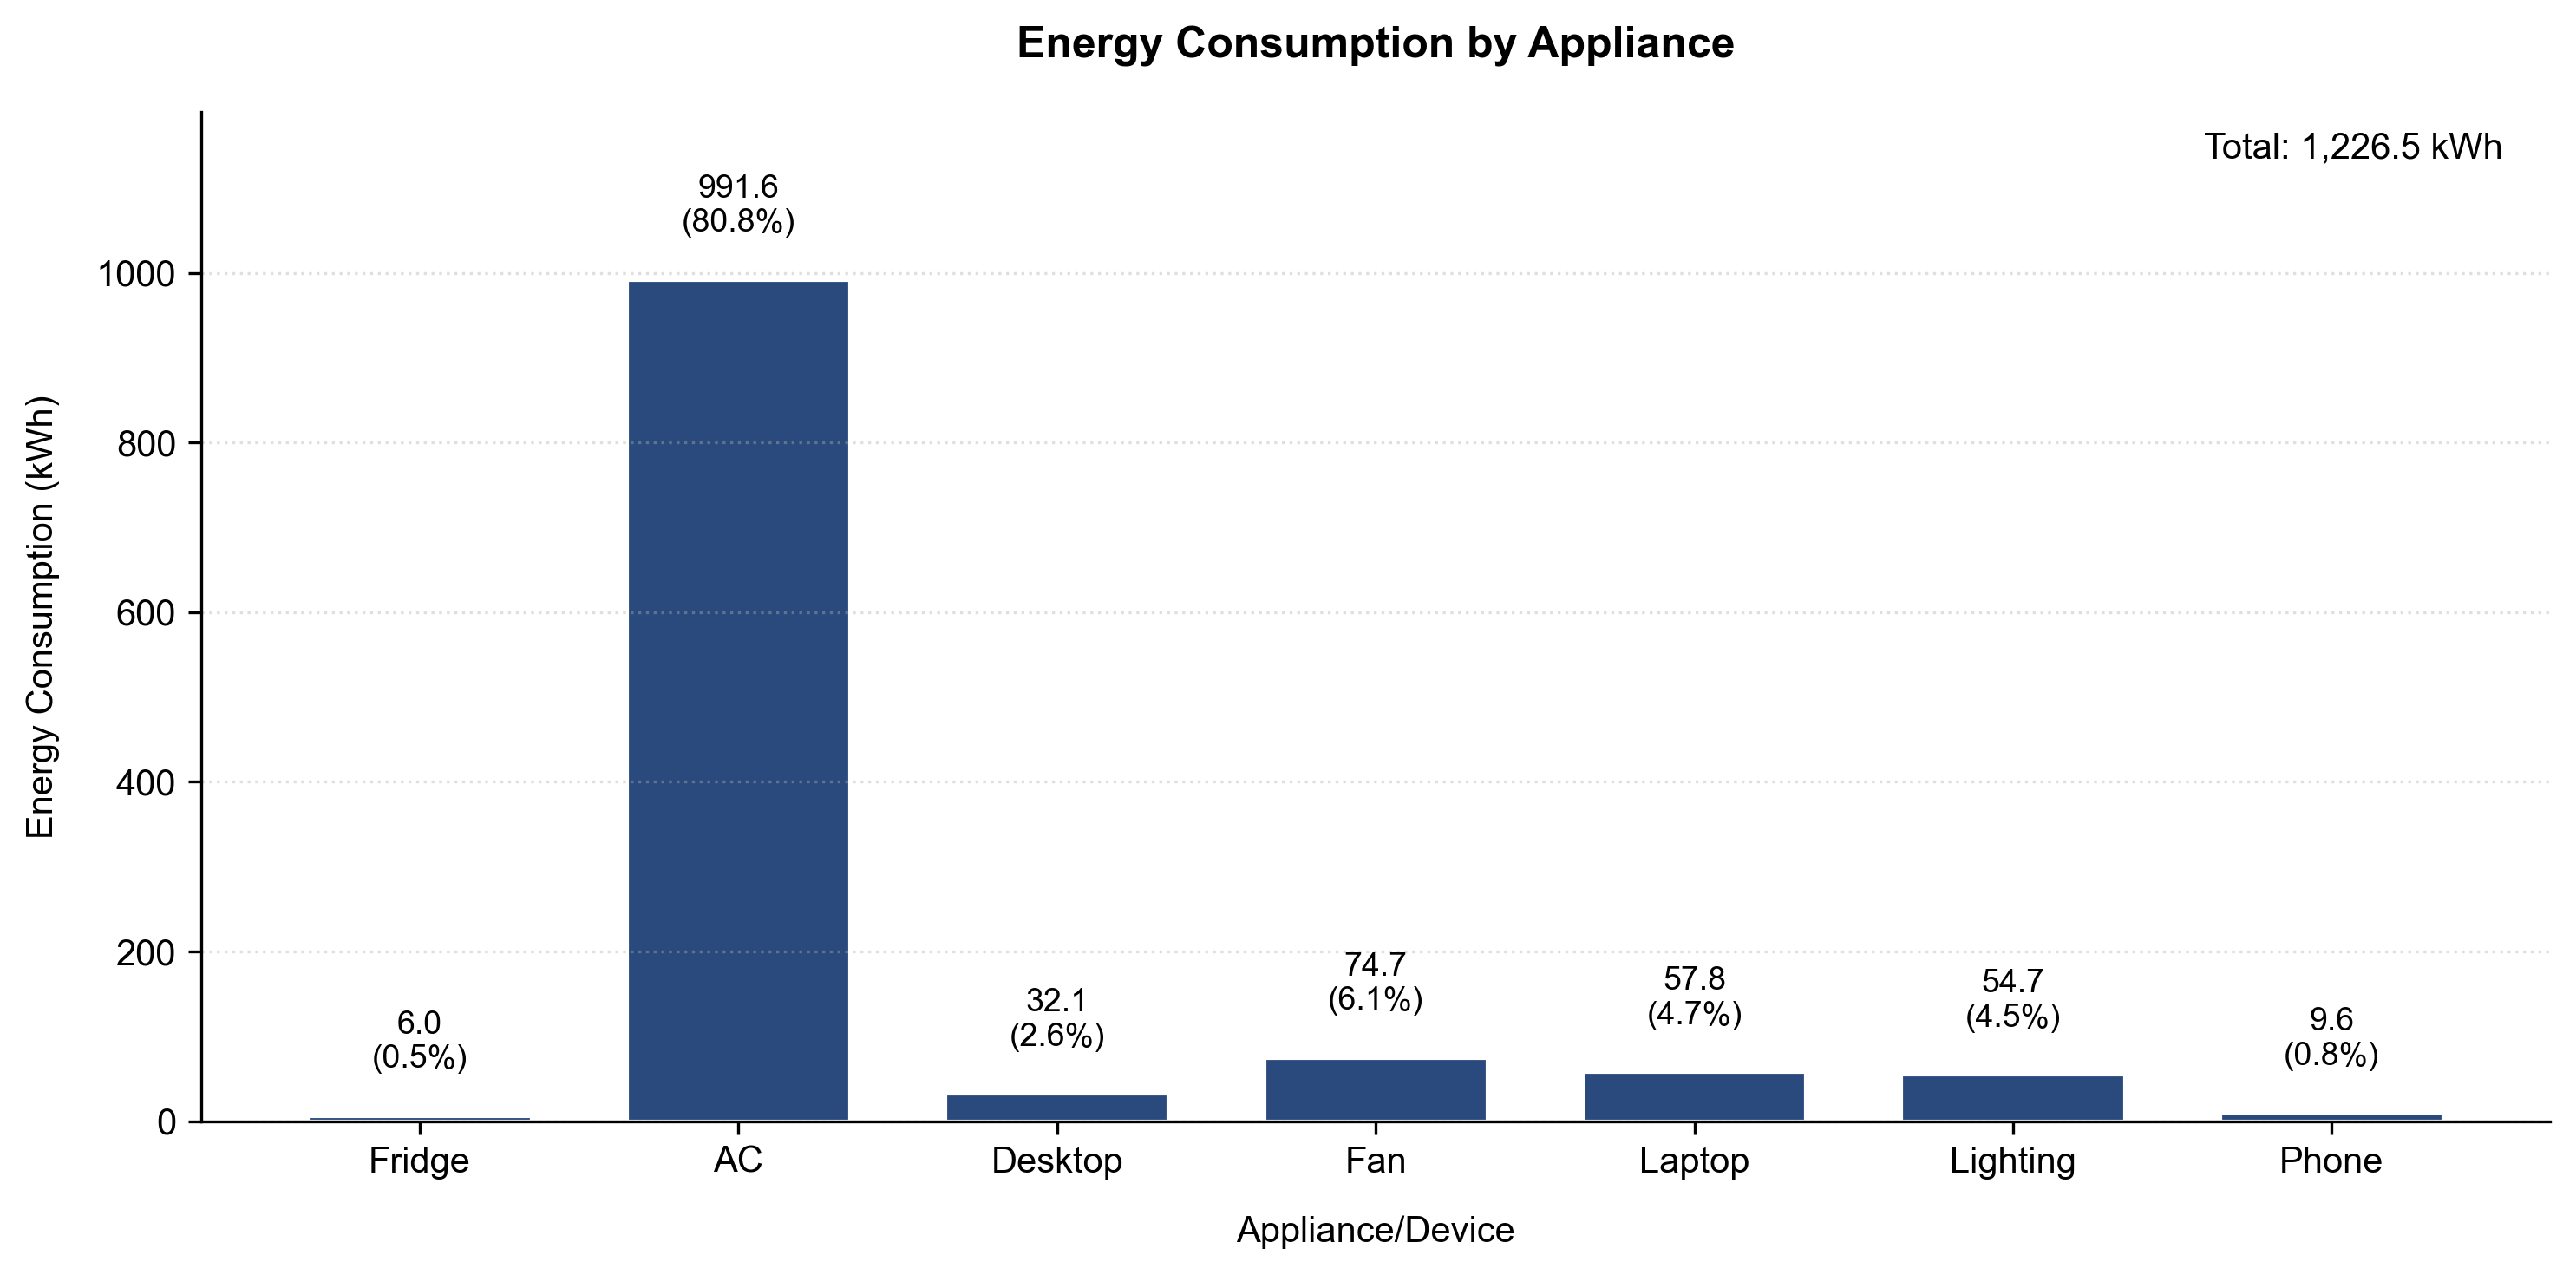

In [ ]:
#  Total electricity consumption of appliances in building    

appliances = ["Fridge", "AC", "Desktop", "Fan", "Laptop", "Lighting", "Phone"]
energy_consumption = [5980, 991600, 32115, 74675, 57840, 54715, 9573] # Values gotten from SQL query
total_energy = sum(energy_consumption)
energy_kwh = [x/1000 for x in energy_consumption]
total_energy_kwh = total_energy/1000


plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'normal'
})


fig, ax = plt.subplots(figsize=(10, 5), dpi=300)  


bars = ax.bar(appliances, energy_kwh, 
              color='#2a4a7d',  
              width=0.7,
              edgecolor='white',
              linewidth=1)


ax.set_title('Energy Consumption by Appliance', pad=15)
ax.set_xlabel('Appliance/Device', labelpad=10)
ax.set_ylabel('Energy Consumption (kWh)', labelpad=10)

plt.xticks(rotation=0, ha='center')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + (0.05 * max(energy_kwh)),
            f'{height:,.1f}\n({height/total_energy_kwh:.1%})',
            ha='center', va='bottom',
            fontsize=9, linespacing=1.2)

ax.grid(axis='y', linestyle=':', alpha=0.4)
ax.set_ylim(0, max(energy_kwh)*1.2)

# Remove top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add total energy annotation
plt.text(0.98, 0.98, f'Total: {total_energy_kwh:,.1f} kWh',
         transform=ax.transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()

plt.show()